<img src="udacity.png" style="height: 100px">
<center style="color:#888">Data Science <br/>Term2 Post</center>
#  AirBnB Madrid


## 1) Business Understanding
In Madrid, and in my neighbourhood in particular, there is a constant debate about the impact of tourist rentals, Airbnbn in particular.

In mid-March, quarantines and border closures began in Europe to deal with COVID. 
Covid's quarantine is a time of uncertainty and change. I think it's interesting to see how the supply of apartments has changed and if it follows the trend detected in other cities

I want to understand the following:

* **Question 1**: without tourism, What happened to tourist rentals?

* **Question 2**: Is the behaviour homogeneous or does any of the characteristics of the rentals take precedence?
you look at how the rentals behave in your area (neighbourhood) or your level (price).

* **Question 3**: Is the behavior of all host homogeneous?
Understand the type of host and how each guest has behaved in the face of uncertainty




In [1]:
# Read Libraries

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

## 2) Data Understanding

### The data 
The data is the apartments for months I have downloaded the data from February to April 2019 and 2020 to see what has happened

Url Madrid: http://insideairbnb.com/madrid/?neighbourhood=&filterEntireHomes=false&filterHighlyAvailable=false&filterRecentReviews=false&filterMultiListings=false#

#### Gather data

In [2]:
# read the data for every month
Mz20 = pd.read_csv('2020_03_17_listings.csv')
Ab20 = pd.read_csv('2020_04_17_listings.csv')

#### Missing values relevants

In [3]:
# Number of nulls
total_Mz20 = Mz20.isnull().sum().sort_values(ascending=False)
percent_Mz20 = (Mz20.isnull().sum()/Mz20.isnull().count()).sort_values(ascending=False)

total_Ab20 = Ab20.isnull().sum().sort_values(ascending=False)
percent_Ab20 = (Ab20.isnull().sum()/Mz20.isnull().count()).sort_values(ascending=False)

In [4]:
# Number of nulls?, which fields has nulls?

print('Mz20 total', total_Mz20[total_Mz20>0])
print('Mz20 %',percent_Mz20[percent_Mz20>.1])

print('Ab20 total', total_Ab20[total_Ab20> 0])
print('Ab20 %',percent_Ab20[percent_Ab20>.1])

('Mz20 total', reviews_per_month    4712
last_review          4712
host_name               4
name                    3
dtype: int64)
('Mz20 %', reviews_per_month    0.212539
last_review          0.212539
dtype: float64)
('Ab20 total', reviews_per_month    4795
last_review          4795
host_name               4
name                    3
dtype: int64)
('Ab20 %', reviews_per_month    0.216283
last_review          0.216283
dtype: float64)


In [5]:
Ab20.columns

Index([u'id', u'name', u'host_id', u'host_name', u'neighbourhood_group',
       u'neighbourhood', u'latitude', u'longitude', u'room_type', u'price',
       u'minimum_nights', u'number_of_reviews', u'last_review',
       u'reviews_per_month', u'calculated_host_listings_count',
       u'availability_365'],
      dtype='object')

### Access & check data

In [6]:
# what is the distribution of the March data?
Mz20[['price','minimum_nights','calculated_host_listings_count']].describe()

,price,minimum_nights,calculated_host_listings_count
count,22170.000000,22170.000000,22170.000000
mean,155.206540,4.586243,12.240505
std,512.805133,23.427038,33.125256
min,1.000000,1.000000,1.000000
25%,39.000000,1.000000,1.000000
50%,65.000000,2.000000,2.000000
75%,100.000000,3.000000,7.000000
max,9999.000000,1125.000000,252.000000


In [7]:
# what is the distribution of the April data?, In April there is a slightly lower average price of nights
Ab20[['price','minimum_nights','calculated_host_listings_count']].describe()


,price,minimum_nights,calculated_host_listings_count
count,21791.000000,21791.000000,21791.000000
mean,163.732458,4.972787,11.805470
std,551.509420,24.713964,28.057666
min,0.000000,1.000000,1.000000
25%,39.000000,1.000000,1.000000
50%,65.000000,2.000000,2.000000
75%,100.000000,3.000000,7.000000
max,9999.000000,1125.000000,177.000000


### First Exploration of data

# Q1: without tourism, What happened to tourist rentals?

In [8]:
# Are there fewer rentals in May than in April? - yes
len(Ab20)-len(Mz20)

-379

#### The data show that the number of flats has been reduced during the covid, the average prices, nights have not changed

In [9]:
# Are there fewer rentals in May than in April? - yes
Ab20.price.mean()-Mz20.price.mean()

8.525917984497283

### **Question 2**: Is the behaviour homogeneous or does any of the characteristics of the rentals take precedence?
you look at how the rentals behave in your area (neighbourhood) or your level (price).

In [10]:
# Is the price different depending on the room type?

Mz20.groupby('room_type')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,13520.0,188.680917,593.756831,10.0,60.00,80.0,120.0,9999.0
Hotel room,247.0,274.433198,355.067294,22.0,60.00,90.0,280.0,1169.0
Private room,8049.0,96.427631,336.178476,1.0,25.00,35.0,50.0,9999.0
Shared room,354.0,130.033898,465.270982,9.0,13.25,20.0,45.0,7000.0


In [11]:
print('uniques:',Mz20['id'].nunique())
print('agregte :',Mz20.groupby('room_type')['price'].describe()['count'].sum())


('uniques:', 22170)
('agregte :', 22170.0)


In [12]:
# Is the price different depending on the room type?, 
"""The number of full and private rooms has been reduced.There is a slight increase in hotel rooms
Only the price of a shared room has been reduced. 
The rest of the rents have slightly increased the price 
and the apartment is the one that has increased the most """
Ab20.groupby('room_type')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,13295.0,201.991877,646.546973,10.0,60.0,80.0,120.00,9999.0
Hotel room,264.0,288.488636,370.908226,0.0,60.0,90.5,312.50,1399.0
Private room,7878.0,96.517898,337.702657,1.0,25.0,35.0,50.00,9999.0
Shared room,354.0,129.612994,465.324663,9.0,14.0,20.0,43.75,7000.0


In [13]:
Ab20.groupby('room_type')['price'].describe()-Mz20.groupby('room_type')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,-225.0,13.310959,52.790142,0.0,0.00,0.0,0.00,0.0
Hotel room,17.0,14.055438,15.840933,-22.0,0.00,0.5,32.50,230.0
Private room,-171.0,0.090267,1.524181,0.0,0.00,0.0,0.00,0.0
Shared room,0.0,-0.420904,0.053682,0.0,0.75,0.0,-1.25,0.0


In [14]:
# Is the price different depending on the group district?
Ab20.groupby('neighbourhood_group')['price'].describe().sort_values(['count','mean'],ascending=False)

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Centro,9973.0,156.984859,548.069102,9.0,49.00,73.0,110.0,9999.0
Salamanca,1484.0,375.279650,1118.443214,10.0,50.00,79.5,145.5,9136.0
Chamberí,1351.0,169.972613,521.468993,9.0,40.00,60.0,100.5,5000.0
Arganzuela,1186.0,103.430860,423.010723,0.0,34.00,52.0,80.0,8465.0
Tetuán,915.0,156.617486,354.483808,9.0,38.50,59.0,97.0,5000.0
Carabanchel,715.0,67.588811,135.838825,9.0,24.00,40.0,70.0,3000.0
Retiro,697.0,138.602582,466.283834,9.0,40.00,65.0,101.0,5000.0
Puente de Vallecas,694.0,74.963977,246.068651,9.0,23.00,36.0,55.0,4000.0
Ciudad Lineal,688.0,103.231105,229.749082,8.0,25.00,40.0,75.0,3000.0


In [15]:
# Is the change different depending on the group district?

"""Only the Salamanca district has increased the number of rentals and the average price."""
z= Ab20.groupby('neighbourhood_group')['price'].describe()-Mz20.groupby('neighbourhood_group')\
['price'].describe()

# Wich district are incresing the number of rooms of price?
z[(z['count']>0)|(z['mean']>0)].sort_values(['count','mean'],ascending=False)

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Chamberí,26.0,-7.082481,-21.232176,0.0,0.00,0.0,-4.5,0.0
Puente de Vallecas,21.0,-1.258906,-5.148750,0.0,0.00,2.0,5.0,0.0
Salamanca,19.0,72.025042,149.610354,0.0,0.00,0.5,5.5,0.0
Retiro,3.0,-1.287907,-0.901132,0.0,1.00,0.0,-9.0,0.0
Vicálvaro,2.0,-4.337198,-2.339609,0.0,-0.25,-4.0,-5.0,0.0
Latina,0.0,3.168375,6.380996,0.0,0.00,0.0,0.0,0.0
Villa de Vallecas,-2.0,0.913569,1.455702,0.0,0.00,0.0,0.5,0.0
Tetuán,-4.0,1.941752,3.711608,0.0,0.50,-1.0,0.0,0.0
Chamartín,-7.0,1.668602,3.772062,0.0,0.00,0.0,0.5,0.0


In [16]:
# Is the change different depending on the group district?

"""Only the Salamanca district has increased the number of rentals and the average price."""
zz= Ab20.groupby('neighbourhood')['price'].describe()-Mz20.groupby('neighbourhood')\
['price'].describe()

print('median of different rents: ',zz['count'].mean())
print('median of different price: ',zz['mean'].mean())

('median of different rents: ', -2.984251968503937)
('median of different price: ', 1.3786420891703743)


In [19]:
# Wich district are incresing the number of rooms of price?
zz[(zz['count']>0) & (zz['mean']>0)].sort_values(['count','mean'],ascending=False)

,count,mean,std,min,25%,50%,75%,max
neighbourhood,,,,,,,,
Portazgo,20.0,0.378788,-8.875501,0.0,1.25,7.0,3.75,0.0
Adelfas,11.0,1.486954,-4.561151,0.0,6.75,7.0,1.00,0.0
Castillejos,4.0,13.005255,2.735396,-7.0,0.00,-5.0,19.25,0.0
Aguilas,3.0,0.145519,-2.752489,0.0,0.00,0.0,7.00,0.0
Costillares,2.0,1.954346,-1.959110,0.0,2.00,0.0,5.00,0.0
Numancia,1.0,1.232858,-0.332248,2.0,0.00,4.0,0.00,0.0
Palomeras Bajas,1.0,0.071186,-3.295363,0.0,1.00,4.5,0.50,0.0


or increased nubmer or increased the price

In [20]:
# Centro is the district with more down the number of rents
z.sort_values(['count'],ascending=True).head(5)

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Centro,-296.0,8.091296,36.209069,0.0,-1.00,-1.0,0.00,0.0
Arganzuela,-44.0,0.645494,6.987108,-8.0,1.00,0.0,0.00,0.0
Moncloa - Aravaca,-23.0,0.731150,9.818792,0.0,0.00,-5.0,0.00,0.0
San Blas - Canillejas,-19.0,4.360918,6.814285,0.0,0.25,0.0,0.00,0.0
Usera,-14.0,-0.109767,-0.819906,0.0,0.00,0.0,-3.75,0.0


In [21]:
# Chamberi is the district with more down price
z.sort_values(['mean'],ascending=True).head(5)

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Chamberí,26.0,-7.082481,-21.232176,0.0,0.00,0.0,-4.50,0.0
Fuencarral - El Pardo,0.0,-6.112211,-6.261005,0.0,0.00,0.0,0.00,0.0
Vicálvaro,2.0,-4.337198,-2.339609,0.0,-0.25,-4.0,-5.00,0.0
Hortaleza,-5.0,-2.894377,0.357575,5.0,0.00,0.0,-4.25,0.0
Villaverde,-9.0,-2.253757,-0.374129,0.0,-1.00,0.0,0.00,0.0


In [22]:
# Salamanca is the district with more increase price
z.sort_values(['mean'],ascending=False).head(5)

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Salamanca,19.0,72.025042,149.610354,0.0,0.00,0.5,5.5,0.0
Centro,-296.0,8.091296,36.209069,0.0,-1.00,-1.0,0.0,0.0
Barajas,-11.0,5.349443,6.363245,-1.0,0.00,1.0,6.0,0.0
San Blas - Canillejas,-19.0,4.360918,6.814285,0.0,0.25,0.0,0.0,0.0
Latina,0.0,3.168375,6.380996,0.0,0.00,0.0,0.0,0.0


After the first answer, i will preparate the data to awnser more 

# Check  dataframes 

nulls, distributions ...

In [23]:
# Select a columns

Mz20_a= Mz20[['id','host_id','neighbourhood','neighbourhood_group','minimum_nights','price','room_type',\
              'calculated_host_listings_count']]
Ab20_a= Ab20[['id','host_id','neighbourhood','neighbourhood_group','minimum_nights','price','room_type',\
            'calculated_host_listings_count']]

In [24]:
# Rename a column

Mz20_a.rename(index=str, columns={"minimum_nights": "nights",\
                                  "room_type": "type",\
                                  "calculated_host_listings_count": "listings",\
                                  "neighbourhood_group": "district"}, inplace=True)
print('Mz20:', Mz20_a.columns)
Ab20_a.rename(index=str, columns={"minimum_nights": "nights",\
                                  "room_type": "type",\
                                  "calculated_host_listings_count": "listings",\
                                  "neighbourhood_group": "district"}, inplace=True)
print('Ab20:', Ab20_a.columns)

('Mz20:', Index([u'id', u'host_id', u'neighbourhood', u'district', u'nights', u'price',
       u'type', u'listings'],
      dtype='object'))
('Ab20:', Index([u'id', u'host_id', u'neighbourhood', u'district', u'nights', u'price',
       u'type', u'listings'],
      dtype='object'))


//anaconda/envs/py3/lib/python2.7/site-packages/pandas/core/frame.py:2844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [25]:
# what is calculated_host_listings_count, H0: number of places
print(len(Ab20[Ab20['host_id'] ==99018982.0]))
Ab20[Ab20['host_id'] ==99018982.0].tail(2)

122


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
20725,42446303,(New) Cozy apartment in Madrid,99018982,Bea Y Juan,Chamartín,Castilla,40.47167,-3.68530,Entire home/apt,62,1,1,2020-03-28,1.0,122,364
20970,42578552,(NEW) Beautiful and cozy apartment in Madrid,99018982,Bea Y Juan,Ciudad Lineal,Concepción,40.43438,-3.65606,Entire home/apt,33,1,0,NaN,NaN,122,345


In [26]:
# top superhost
Ab20.groupby('host_id')['id'].nunique().sort_values(ascending=False).head(5)

host_id
102947901    177
247570318    150
206349691    129
28038703     124
99018982     122
Name: id, dtype: int64

In [27]:
# in April the number os host has been reduced

Ab20.groupby('host_id')['id'].nunique().describe()

count    12304.000000
mean         1.771050
std          4.215792
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        177.000000
Name: id, dtype: float64

In [28]:
Mz20.groupby('host_id')['id'].nunique().describe()

count    12540.000000
mean         1.767943
std          4.303065
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        252.000000
Name: id, dtype: float64

In [29]:
# funtion plot básics

def plotbasic (df,priceM1,priceM2,typeM2):
    fig = plt.figure()
    #fig.subplots_adjust(hspace=0.5, wspace=0.5) 
    ax = fig.add_subplot(2, 2, 1)
    sns.distplot(df[priceM1].dropna(),bins=100,ax=ax);
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax = fig.add_subplot(2, 2, 2)
    sns.distplot(df[priceM2].dropna(),bins=100,ax=ax);
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax = fig.add_subplot(2, 2, 3)
    sns.boxplot(data =df,x=typeM2,y=priceM1, showfliers=False,ax=ax);
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax = fig.add_subplot(2, 2, 4)
    sns.boxplot(data =df,x=typeM2,y=priceM2, showfliers=False,ax=ax);
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.show()

In [30]:
sns.set_context('poster')  #Everything is larger
sns.set_context('paper')  #Everything is smaller
sns.set_context('talk')  #Everything is sized for a presentation
sns.set( palette=("viridis"))

## PREPARATE DATA
### Create a unique dataframe

I want to check if you have changed the categories of each floor of the columns I am interested in and create a unique field for both months

In [39]:
Ab20_Li = Ab20_a['id'].tolist()
Mz20_Li = Mz20_a['id'].tolist()

In [36]:
def difference(list1,list2):
    return list(set(list1).symmetric_difference(list2))

In [38]:
x=len(difference(Ab20_Li,Mz20_Li))
y= len(list(set(Mz20_Li).intersection(Ab20_Li)))
print('diff: ', x)
print('equals: ',y)
print('total: ',x+y)

('diff: ', 1699)
('equals: ', 21131)
('total: ', 22830)


In [34]:
u = Ab20_a.merge(Mz20_a, on=['id', 'id'], suffixes=('_April20', '_March20'), how='outer') 
#u.columns = u.columns.str.replace('__2', '')
print(u.shape)
u.head(2)

(22830, 15)


,id,host_id_April20,neighbourhood_April20,district_April20,nights_April20,price_April20,type_April20,listings_April20,host_id_March20,neighbourhood_March20,district_March20,nights_March20,price_March20,type_March20,listings_March20
0,6369,13660.0,Hispanoamérica,Chamartín,1.0,70.0,Private room,1.0,13660.0,Hispanoamérica,Chamartín,1.0,70.0,Private room,1.0
1,21853,83531.0,Cármenes,Latina,4.0,30.0,Private room,2.0,83531.0,Cármenes,Latina,4.0,30.0,Private room,2.0



# Check changes in neighbourhood & district

### Part of question 2: Is the behaviour homogeneous or does any of the characteristics of the rentals take precedence?¶

- First check the differences, the nulls 
- Preparing the data: creating the ranges of changes
- data visualization
- conclusions

In [40]:
# Field to check if the neighborhood is the same from one month to another 
"""it could be because the apartment does not exist one of the months or
because the neighborhood has really changed """

u['check_neigh'] = np.where(u['neighbourhood_April20']==u['neighbourhood_March20']\
                                    , 'yes', 'no')

# What rooms have the same neighborhood from one month to the next?

u['check_neigh'].value_counts()

yes    21129
no      1701
Name: check_neigh, dtype: int64

In [41]:
# Which rooms does not exist every month

print(u['neighbourhood_April20'].isnull().sum().sum(),\
      u['neighbourhood_March20'].isnull().sum().sum())
1039+660

(1039, 660)


1699

In [42]:
# What rooms have the different neighborhood and isn´t null

u[(u['check_neigh'] =='no') & (u['neighbourhood_April20']\
                                  .notnull()) &  (u['neighbourhood_March20'].notnull())]

,id,host_id_April20,neighbourhood_April20,district_April20,nights_April20,price_April20,type_April20,listings_April20,host_id_March20,neighbourhood_March20,district_March20,nights_March20,price_March20,type_March20,listings_March20,check_neigh
7897,21875158,159570292.0,Sol,Centro,1.0,500.0,Private room,2.0,159570292.0,Cortes,Centro,1.0,500.0,Entire home/apt,2.0,no
9798,25831146,159570292.0,Sol,Centro,1.0,500.0,Private room,2.0,159570292.0,Argüelles,Moncloa - Aravaca,1.0,500.0,Entire home/apt,2.0,no


In [43]:
# create a unique filed neighbourhood, fill with the neighbourhood of april by default.

u['neighbourhood'] = u['neighbourhood_April20']
u['neighbourhood'] = u['neighbourhood'].fillna(u['neighbourhood_March20'])


In [44]:
# Field to check if the district is the same from one month to another 


u['check_district'] = np.where(u['district_April20']==u['district_March20']\
                                    , 'yes', 'no')

# What rooms have the same district from one month to the next?
u['check_district'].value_counts()

yes    21130
no      1700
Name: check_district, dtype: int64

In [46]:
# Which rooms does not exist every month

print(u['district_April20'].isnull().sum().sum(),\
      u['district_March20'].isnull().sum().sum())
1039+660

(1039, 660)


1699

In [45]:
# What rooms have the different district and isn´t null

u[(u['check_district'] =='no') & (u['district_April20']\
                                  .notnull()) &  (u['district_March20'].notnull())]

,id,host_id_April20,neighbourhood_April20,district_April20,nights_April20,price_April20,type_April20,listings_April20,host_id_March20,neighbourhood_March20,district_March20,nights_March20,price_March20,type_March20,listings_March20,check_neigh,neighbourhood,check_district
9798,25831146,159570292.0,Sol,Centro,1.0,500.0,Private room,2.0,159570292.0,Argüelles,Moncloa - Aravaca,1.0,500.0,Entire home/apt,2.0,no,Sol,no


In [47]:
# create a unique field district, fill with the district of april by default.

u['district'] = u['district_April20']
u['district'] = u['district_April20'].fillna(u['district_March20'])

In [48]:
# calculate the ranges to convert price by neighbourhood into categorical data

u.groupby('neighbourhood')['price_April20'].quantile([0.25, 0.5, 0.75])

neighbourhood         
Abrantes          0.25      21.50
                  0.50      35.00
                  0.75      75.00
Acacias           0.25      30.00
                  0.50      45.00
                  0.75      75.00
Adelfas           0.25      41.75
                  0.50      58.00
                  0.75      71.00
Aeropuerto        0.25      24.25
                  0.50      31.50
                  0.75      77.25
Aguilas           0.25      25.00
                  0.50      35.00
                  0.75      65.00
Alameda de Osuna  0.25      35.00
                  0.50      50.00
                  0.75     120.00
Almagro           0.25      45.00
                  0.50      80.00
                  0.75     110.00
Almenara          0.25      40.00
                  0.50      65.00
                  0.75     104.25
Almendrales       0.25      25.25
                  0.50      43.00
                  0.75      55.00
Aluche            0.25      20.00
                  0.50   

In [49]:
# see the ranges of  price by neighbourhood into categorical data

q5_p = u['price_April20'].quantile(0.5, interpolation='nearest')
q6_p = u['price_April20'].quantile(0.6, interpolation='nearest')
q7_p = u['price_April20'].quantile(0.7, interpolation='nearest')
q8_p = u['price_April20'].quantile(0.8, interpolation='nearest')
q9_p = u['price_April20'].quantile(0.9, interpolation='nearest')
print(q5_p, q6_p,q7_p,q8_p,q9_p)

(65.0, 75.0, 92.0, 120.0, 200.0)


In [51]:
# calculate Graoup dataframe by neighbourhood, to see median of every neighbourhood

campos_grupos=['neighbourhood']
variables={'host_id_April20':'count','host_id_March20':'count','price_April20':'mean','price_March20':'mean' }
df_neigPr=pd.DataFrame(u.groupby(campos_grupos).aggregate(variables))

df_neigPr.head()

,price_March20,host_id_March20,price_April20,host_id_April20
neighbourhood,,,,
Abrantes,53.440000,50,52.803922,51
Acacias,91.245098,204,91.970443,203
Adelfas,64.917808,73,66.404762,84
Aeropuerto,44.437500,16,44.562500,16
Aguilas,65.956522,46,66.102041,49


In [52]:
# calculate the ranges to convert price by neighbourhood into categorical data. In data

q25_pp = df_neigPr['price_April20'].quantile(0.25, interpolation='nearest')
q5_pp =df_neigPr['price_April20'].quantile(0.5, interpolation='nearest')
q75_pp =df_neigPr['price_April20'].quantile(0.75, interpolation='nearest')
print(q25_pp, q5_pp,q75_pp)

(79.62962962962963, 107.70454545454545, 174.28301886792454)


In [53]:
# calculate the ranges to convert rank of host  by neighbourhood into categorical data. In data
q25_nn = df_neigPr['host_id_April20'].quantile(0.25, interpolation='nearest')
q5_nn =df_neigPr['host_id_April20'].quantile(0.5, interpolation='nearest')
q75_nn =df_neigPr['host_id_April20'].quantile(0.75, interpolation='nearest')
print(q25_nn, q5_nn,q75_nn)

(36, 82, 159)


In [54]:
# calculate the ranges to convert price by neighbourhood into categorical data. In data
conditions = [
    (df_neigPr['price_April20'] <= q25_pp),
    (df_neigPr['price_April20']<= q5_pp) & (df_neigPr['price_April20'] > q25_pp),
    (df_neigPr['price_April20']<= q75_pp) & (df_neigPr['price_April20'] > q5_pp),
    (df_neigPr['price_April20'] > q75_pp)]
choices = ['Low','M-Low','M-High','High']

In [55]:
# Create a field the ranges to convert price by neighbourhood into categorical data. In data

df_neigPr['neig_pricetype_app'] = np.select(conditions, choices, default='null')
df_neigPr['neig_pricetype_app'].value_counts()

Low       33
High      32
M-High    31
M-Low     31
Name: neig_pricetype_app, dtype: int64

In [56]:
# calculate the ranges by host  by neighbourhood into categorical data. In data

conditions = [
    (df_neigPr['host_id_April20'] <= q25_nn),
    (df_neigPr['host_id_April20']<= q5_nn) & (df_neigPr['host_id_April20'] > q25_nn),
    (df_neigPr['host_id_April20']<= q75_nn) & (df_neigPr['host_id_April20'] > q5_nn),
    (df_neigPr['host_id_April20'] > q75_nn)]
choices = ['Low','M-Low','M-High','High']

In [57]:
df_neigPr['number_app'] = np.select(conditions, choices, default='null')
df_neigPr['number_app'].value_counts()

Low       34
M-High    32
High      31
M-Low     30
Name: number_app, dtype: int64

In [59]:
df_neigPr[(df_neigPr['neig_pricetype_app']=='High')&(df_neigPr['number_app']=='High')]

,price_March20,host_id_March20,price_April20,host_id_April20,neig_pricetype_app,number_app
neighbourhood,,,,,,
Almagro,212.533333,210,184.225806,217,High,High
Castellana,348.080214,187,333.471795,195,High,High
Cortes,176.441634,1028,180.260479,1002,High,High
Goya,290.653614,332,287.163205,337,High,High
Guindalera,140.758741,286,556.015209,263,High,High
Justicia,209.814167,1200,223.476271,1180,High,High
Lista,370.236715,207,363.070755,212,High,High
Recoletos,504.516556,302,482.717325,329,High,High
Trafalgar,235.297650,383,232.248062,387,High,High


In [60]:
df_neigPr[(df_neigPr['neig_pricetype_app']=='Low')&(df_neigPr['number_app']=='Low')]

,price_March20,host_id_March20,price_April20,host_id_April20,neig_pricetype_app,number_app
neighbourhood,,,,,,
Aeropuerto,44.437500,16,44.562500,16,Low,Low
Aravaca,207.810811,37,74.750000,36,Low,Low
Butarque,64.133333,15,33.500000,12,Low,Low
Casco Histórico de Barajas,68.189189,37,68.000000,36,Low,Low
Cuatro Vientos,73.333333,9,73.333333,9,Low,Low
Horcajo,32.333333,3,32.333333,3,Low,Low
Orcasur,36.708333,24,33.586207,29,Low,Low
Pavones,54.142857,7,54.142857,7,Low,Low
San Cristobal,52.653846,26,55.217391,23,Low,Low


In [61]:
df_neigPr['diff'] =df_neigPr['price_April20']-df_neigPr['price_March20']
df_neigPr[df_neigPr['diff']>10].sort_values(by=['diff'])

,price_March20,host_id_March20,price_April20,host_id_April20,neig_pricetype_app,number_app,diff
neighbourhood,,,,,,,
Salvador,191.861111,36,202.093750,32,High,Low,10.232639
Moscardó,193.905660,106,204.594059,101,High,M-High,10.688399
Castillejos,193.805556,144,206.810811,148,High,M-High,13.005255
Justicia,209.814167,1200,223.476271,1180,High,High,13.662105
Valdezarza,73.456140,57,93.160714,56,M-Low,M-Low,19.704574
Alameda de Osuna,170.797101,69,190.704918,61,High,M-Low,19.907817
Universidad,146.114664,2189,170.994816,2122,M-High,High,24.880152
Canillejas,485.844444,90,513.571429,84,High,M-High,27.726984
Casa de Campo,105.647619,105,146.570000,100,M-High,M-High,40.922381


In [62]:
df_neigPr['diff_n'] =df_neigPr['host_id_March20']-df_neigPr['host_id_April20']
df_neigPr[df_neigPr['diff_n']>10].sort_values(by=['diff_n'])

,price_March20,host_id_March20,price_April20,host_id_April20,neig_pricetype_app,number_app,diff,diff_n
neighbourhood,,,,,,,,
Delicias,122.227273,220,125.578947,209,M-High,High,3.351675,11
Sol,125.873435,1438,128.879298,1425,M-High,High,3.005863,13
Chopera,66.033898,177,67.858025,162,Low,High,1.824126,15
Palos de Moguer,92.225888,394,90.287599,379,M-Low,High,-1.938289,15
Justicia,209.814167,1200,223.476271,1180,High,High,13.662105,20
Guindalera,140.758741,286,556.015209,263,High,High,415.256468,23
Cortes,176.441634,1028,180.260479,1002,High,High,3.818845,26
Palacio,142.215517,1624,139.053266,1577,M-High,High,-3.162252,47
Universidad,146.114664,2189,170.994816,2122,M-High,High,24.880152,67


In [63]:
df_neigPr[(df_neigPr['diff_n']>5) & (df_neigPr['diff']>5)].sort_values(by=['diff_n'])

,price_March20,host_id_March20,price_April20,host_id_April20,neig_pricetype_app,number_app,diff,diff_n
neighbourhood,,,,,,,,
Almendrales,125.425000,80,134.878378,74,M-High,M-Low,9.453378,6
Canillejas,485.844444,90,513.571429,84,High,M-High,27.726984,6
Ciudad Universitaria,166.417722,79,173.315068,73,M-High,M-Low,6.897347,6
Cármenes,93.970588,68,99.548387,62,M-Low,M-Low,5.577799,6
Alameda de Osuna,170.797101,69,190.704918,61,High,M-Low,19.907817,8
Justicia,209.814167,1200,223.476271,1180,High,High,13.662105,20
Guindalera,140.758741,286,556.015209,263,High,High,415.256468,23
Universidad,146.114664,2189,170.994816,2122,M-High,High,24.880152,67


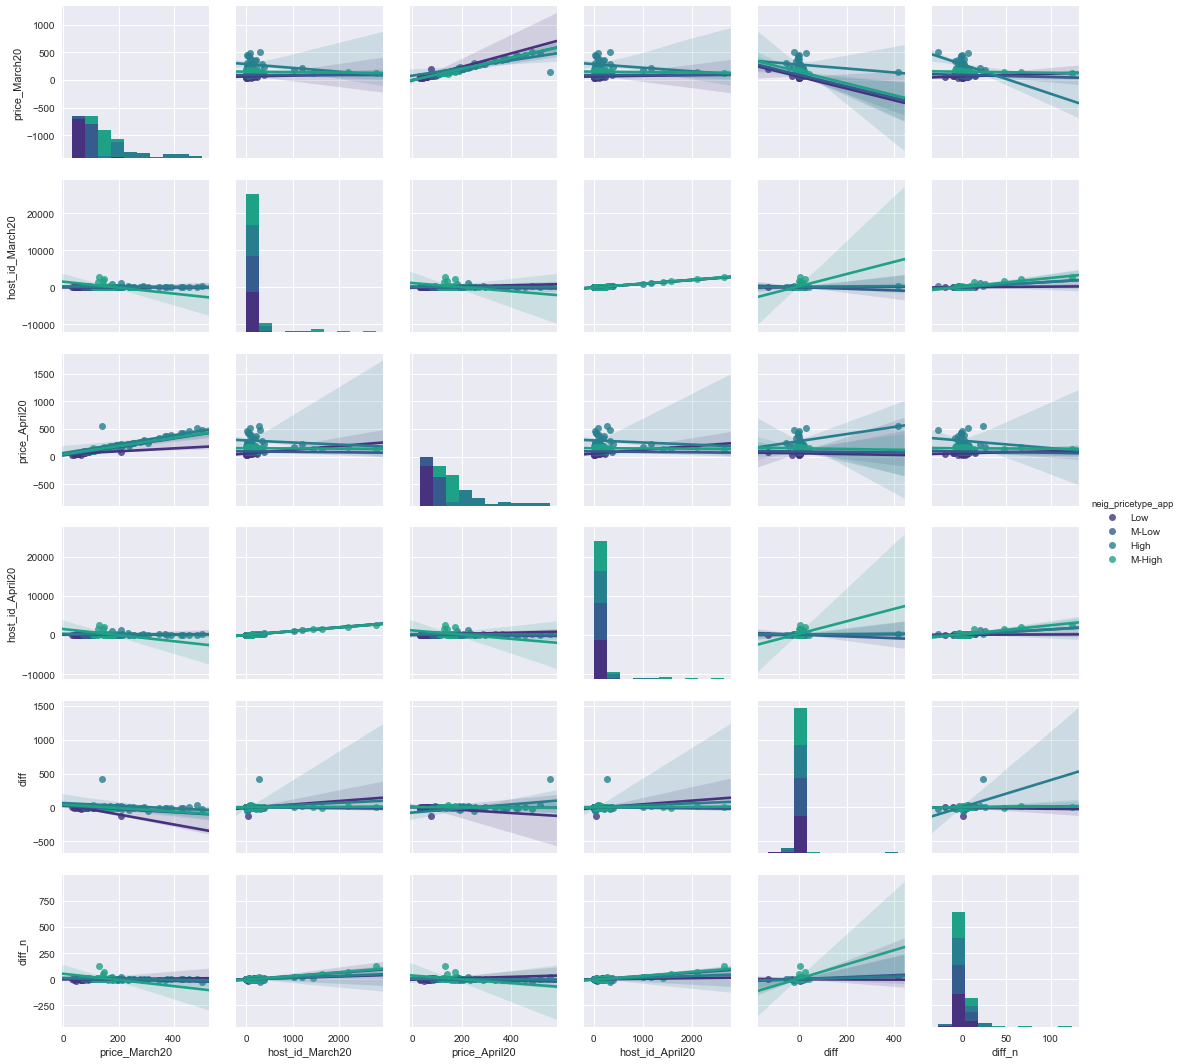

In [64]:
sns.pairplot(df_neigPr, kind="reg",hue='neig_pricetype_app')

### question 2: Is the behaviour homogeneous or does any of the characteristics of the rentals take precedence?¶

If you plot the data grouped by **neighbourhood**, you will see a **negative** slope between the neighbourhoods with changes in the number of rents and in the average price of the rents, look like**or change price or number of rents**.
As the **volume of apartments in the host increases, the slope becomes more negative** with respect to the change in price

The neighborhood with the **low price** level is the one with the highest slope if we compare the prices of April and March


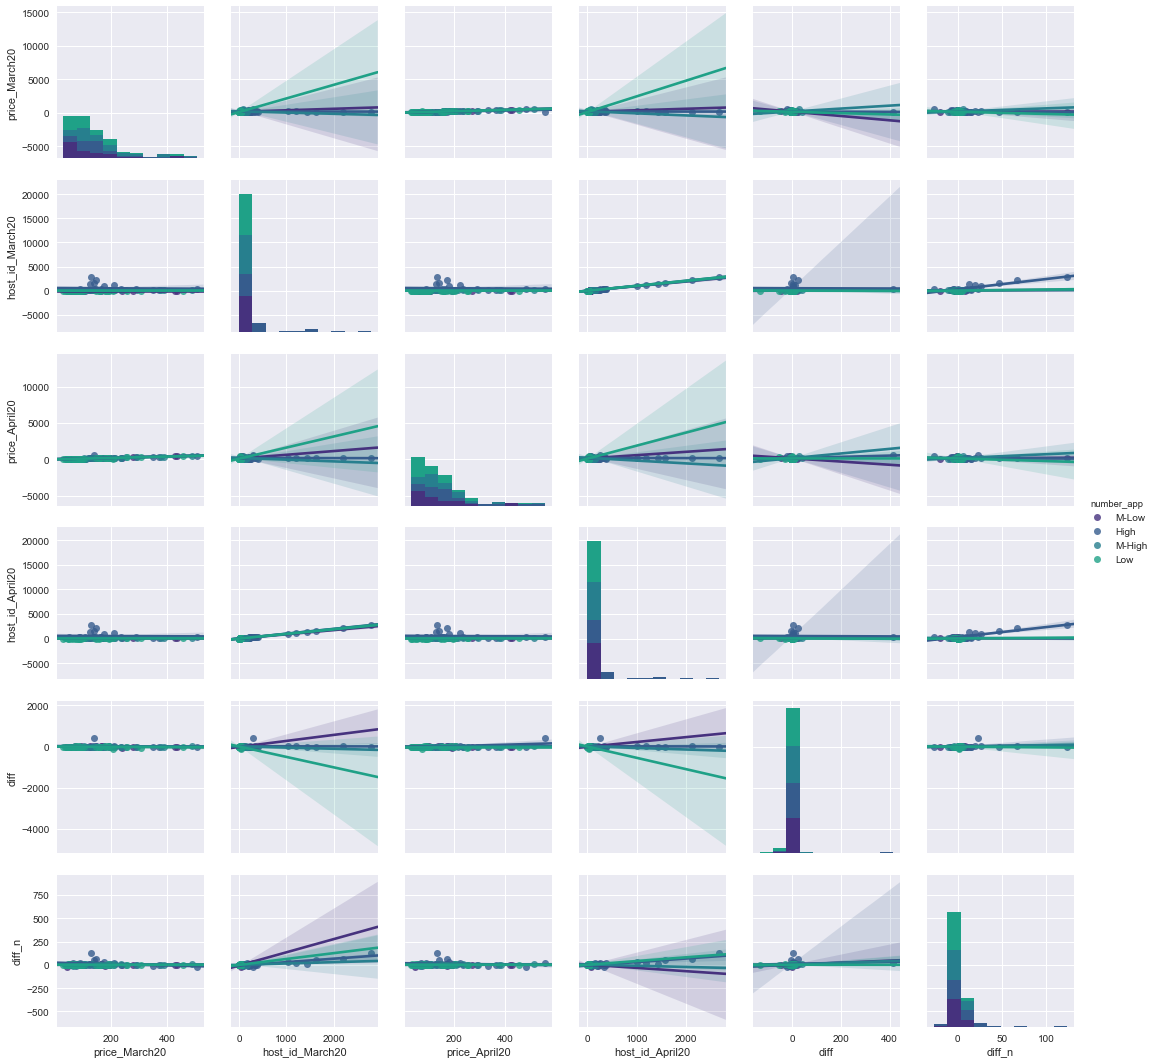

In [65]:
sns.pairplot(df_neigPr, kind="reg",hue='number_app')

In [66]:
df_neigPr_2 = df_neigPr.reset_index()
df_neigPr_2 =df_neigPr_2[['number_app','neig_pricetype_app','neighbourhood']]
df_neigPr_2.rename(columns={'number_app': 'Rank_neigh_qu', 'neig_pricetype_app': 'Rank_neigh_pri'}, inplace=True)
df_neigPr_2.head()

,Rank_neigh_qu,Rank_neigh_pri,neighbourhood
0,M-Low,Low,Abrantes
1,High,M-Low,Acacias
2,M-High,Low,Adelfas
3,Low,Low,Aeropuerto
4,M-Low,Low,Aguilas


In [67]:
u= pd.merge(u, df_neigPr_2, on=['neighbourhood'],how='outer')

In [68]:
u['Rank_neigh_qu'].value_counts()

High      16779
M-High     3580
M-Low      1758
Low         713
Name: Rank_neigh_qu, dtype: int64

In [69]:
u['Rank_neigh_pri'].value_counts()

M-High    11876
High       5986
M-Low      2530
Low        2438
Name: Rank_neigh_pri, dtype: int64

In [ ]:
#https://github.com/jeremysmith244/datascientist_project1_bostonairbnb/blob/master/datascientist_project1_blogpost.ipynb
#https://jingwen-z.github.io/how-to-draw-a-variety-of-maps-with-folium-in-python/

## check type

In [70]:
u['check_type'] = np.where(u['type_April20']==u['type_March20']\
                                    , 'yes', 'no')

In [71]:
# Change  type

len(u[(u['check_type'] =='no') & (u['type_April20']\
                                  .notnull()) &  (u['type_March20'].notnull())])

11

In [72]:
u[(u['check_type'] =='no') & (u['type_April20']\
                                  .notnull()) &  (u['type_March20'].notnull())]\
.filter(like='type', axis=1)

,type_April20,type_March20,check_type
864,Private room,Hotel room,no
2149,Private room,Entire home/apt,no
2257,Private room,Entire home/apt,no
2839,Entire home/apt,Private room,no
2840,Private room,Entire home/apt,no
7786,Private room,Shared room,no
11125,Entire home/apt,Private room,no
11386,Private room,Entire home/apt,no
13562,Private room,Entire home/apt,no
13982,Private room,Entire home/apt,no


In [73]:
list_idx=[]
list_idx = list(u[(u['check_type'] =='no') & (u['type_April20']\
                                  .notnull()) &  (u['type_March20'].notnull())]\
.filter(like='type', axis=1).index) 
list_idx

[864, 2149, 2257, 2839, 2840, 7786, 11125, 11386, 13562, 13982, 14537]

In [74]:
# only one that change type change price  (down)

u.ix[list_idx][['price_March20','price_April20']]

/anaconda/envs/py3/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  app.launch_new_instance()


,price_March20,price_April20
864,90.0,90.0
2149,500.0,500.0
2257,500.0,500.0
2839,54.0,54.0
2840,70.0,70.0
7786,65.0,65.0
11125,40.0,40.0
11386,60.0,60.0
13562,38.0,38.0
13982,80.0,50.0


## Check Price

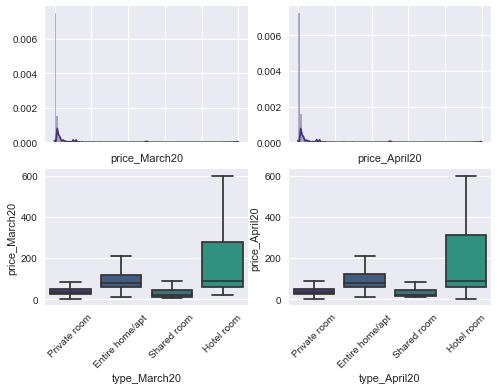

In [75]:
# check ditributions

fig = plt.figure()
#fig.subplots_adjust(hspace=0.5, wspace=0.5) 
ax = fig.add_subplot(2, 2, 1)
sns.distplot(u['price_March20'].dropna(),bins=100,ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax = fig.add_subplot(2, 2, 2)
sns.distplot(u['price_April20'].dropna(),bins=100,ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax = fig.add_subplot(2, 2, 3)
sns.boxplot(data =u,x="type_March20",y='price_March20', showfliers=False,ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax = fig.add_subplot(2, 2, 4)
sns.boxplot(data =u,x="type_April20",y='price_April20', showfliers=False,ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

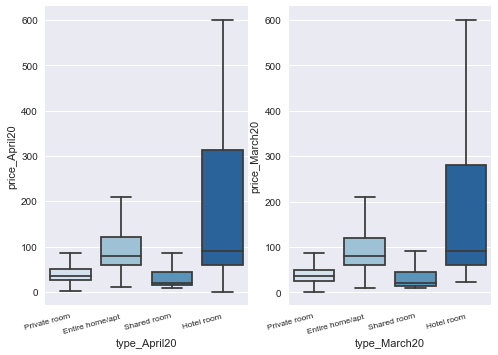

In [76]:
fig, axs = plt.subplots(ncols=2)
g= sns.boxplot(data =u,x='type_April20',y='price_April20', showfliers=False, palette=("Blues"), ax=axs[0])
plt.setp(g.get_xticklabels(), rotation=15,horizontalalignment='right',fontweight='light',fontsize='x-small')
g = sns.boxplot(data =u,x='type_March20',y='price_March20', showfliers=False, palette=("Blues"), ax=axs[1])
plt.setp(g.get_xticklabels(), rotation=15,horizontalalignment='right',fontweight='light',fontsize='x-small')
sns.set_context("talk");
g.figure.savefig("Boxplot_AribnbMadridCovid2.png")

In [78]:
u['check_price'] = np.where(u['price_April20']==u['price_March20'], 'yes', 'no')

In [79]:
# How many rooms change the price
print('Rooms change price:', len(u[(u['check_price'] =='no') & (u['price_April20']\
                                  .notnull())& (u['price_March20'].notnull())]))

u[(u['check_price'] =='no') & (u['price_April20']\
                                  .notnull())& (u['price_March20'].notnull())].head(2)

('Rooms change price:', 1652)


,id,host_id_April20,neighbourhood_April20,district_April20,nights_April20,price_April20,type_April20,listings_April20,host_id_March20,neighbourhood_March20,...,type_March20,listings_March20,check_neigh,neighbourhood,check_district,district,Rank_neigh_qu,Rank_neigh_pri,check_type,check_price
25,15705869,5956402.0,Hispanoamérica,Chamartín,5.0,77.0,Entire home/apt,3.0,5956402.0,Hispanoamérica,...,Entire home/apt,3.0,yes,Hispanoamérica,yes,Chamartín,M-High,High,yes,no
26,16075620,100336740.0,Hispanoamérica,Chamartín,1.0,114.0,Entire home/apt,50.0,100336740.0,Hispanoamérica,...,Entire home/apt,49.0,yes,Hispanoamérica,yes,Chamartín,M-High,High,yes,no


In [80]:
# The rents that were in March have fallen by 50% and another 50% have risen in price. 
# The average price difference was 101 euros

u['diff_price'] = u['price_April20'] - u['price_March20'] 
print(u['diff_price'].describe())
u[u['diff_price'].notnull() & (u['diff_price']!=0)]['diff_price'].describe()

count    21131.000000
mean         7.917373
std        197.532429
min       -945.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4950.000000
Name: diff_price, dtype: float64


count    1652.000000
mean      101.272397
std       699.941274
min      -945.000000
25%       -15.000000
50%        -1.000000
75%         7.000000
max      4950.000000
Name: diff_price, dtype: float64

In [81]:
u[u['diff_price'].notnull() & (u['diff_price']!=0)].filter(like='price', axis=1)\
.sort_values(by=['diff_price']).head(4)

,price_April20,price_March20,check_price,diff_price
12601,55.0,1000.0,no,-945.0
13006,120.0,410.0,no,-290.0
14120,209.0,473.0,no,-264.0
14907,247.0,505.0,no,-258.0


In [82]:
u[(u['diff_price']<-200)].filter(like='price', axis=1).sort_values(by=['diff_price'])

,price_April20,price_March20,check_price,diff_price
12601,55.0,1000.0,no,-945.0
13006,120.0,410.0,no,-290.0
14120,209.0,473.0,no,-264.0
14907,247.0,505.0,no,-258.0
2821,49.0,299.0,no,-250.0
16907,279.0,529.0,no,-250.0
14908,234.0,461.0,no,-227.0
10200,279.0,505.0,no,-226.0
8331,99.0,320.0,no,-221.0


### REMOVE OUTLIERS PRICE

In [86]:
#remove price april outliers
uq_low = u["price_April20"].quantile(0.01)
uq_hi  = u["price_April20"].quantile(0.99)

#descoment when is the firts time you did it
#u_out= u[(u["price_April20"] < uq_hi) & (u["price_April20"] > uq_low)]

In [87]:
#remove price March outliers
uq_low = u["price_March20"].quantile(0.01)
uq_hi  = u["price_March20"].quantile(0.99)

u_out= u_out[(u_out["price_March20"] < uq_hi) & (u_out["price_March20"] > uq_low)]

In [88]:
#remove outliers of change of price
uq_low = u_out["diff_price"].quantile(0.01)
uq_hi  = u_out["diff_price"].quantile(0.99)

u_out= u_out[(u_out["diff_price"] < uq_hi) & (u_out["diff_price"] > uq_low)]

In [89]:
u_out['diff_price'].describe()

count    20202.00000
mean        -0.21191
std          2.65955
min        -28.00000
25%          0.00000
50%          0.00000
75%          0.00000
max         16.00000
Name: diff_price, dtype: float64

In [90]:

print('Union the data of April and March we have {} observations,\
we can observe that there are cases of extreme prices of each one of the months and \
of the changes in the price, {} cases.\
Eliminating these cases we continue working with {} observations'.format(len(u),(len(u)-len(u_out)),len(u_out)))


Union the data of April and March we have 22830 observations,we can observe that there are cases of extreme prices of each one of the months and of the changes in the price, 2628 cases.Eliminating these cases we continue working with 20202 observations


//anaconda/envs/py3/lib/python2.7/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


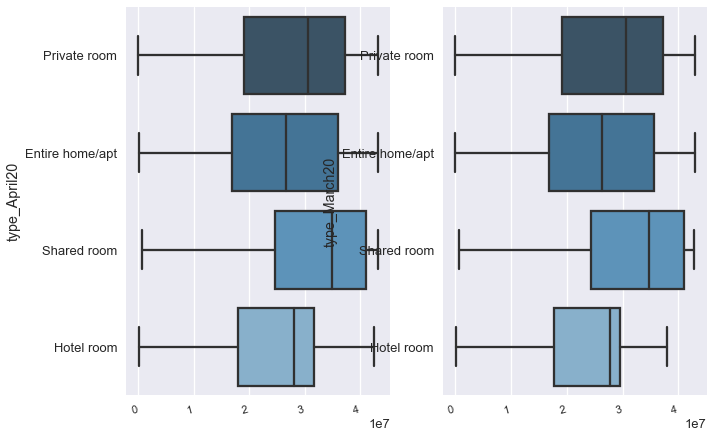

In [91]:
fig, axs = plt.subplots(ncols=2)
g= sns.boxplot(u.type_April20,groupby=u.id.unique(),  showfliers=False, palette=("Blues_d"), ax=axs[0])
plt.setp(g.get_xticklabels(), rotation=15,horizontalalignment='right',fontweight='light',fontsize='x-small')
g = sns.boxplot(u.type_March20,groupby=u.id.unique(), showfliers=False, palette=("Blues_d"), ax=axs[1])
plt.setp(g.get_xticklabels(), rotation=15,horizontalalignment='right',fontweight='light',fontsize='x-small')
sns.set_context("talk");
g.figure.savefig("Boxplot_AribnbMadridCovid3.png")

In [92]:
u.groupby("type_April20")[['price_March20','price_April20']].describe()

price_March20                                            \
                        count        mean         std   min   25%   50%   
type_April20                                                              
Entire home/apt       12855.0  191.807468  603.376454  10.0  60.0  80.0   
Hotel room              245.0  276.000000  356.091683  22.0  60.0  91.0   
Private room           7680.0   97.435937  341.581183   1.0  25.0  35.0   
Shared room             351.0  130.475783  467.216706   9.0  13.0  20.0   

                               price_April20                                \
                   75%     max         count        mean         std   min   
type_April20                                                                 
Entire home/apt  120.0  9999.0       13295.0  201.991877  646.546973  10.0   
Hotel room       280.0  1169.0         264.0  288.488636  370.908226   0.0   
Private room      50.0  9999.0        7878.0   96.517898  337.702657   1.0   
Shared room       45.0  7000.0         354.0  129.612994  465.324663   9.0   

                                             
                  25%   50%     75%     max  
type_April20                                 
Entire home/apt  60.0  80.0  120.00  9999.0  
Hotel room       60.0  90.5  312.50  1399.0  
Private room     25.0  35.0   50.00  9999.0  
Shared room      14.0  20.0   43.75  7000.0

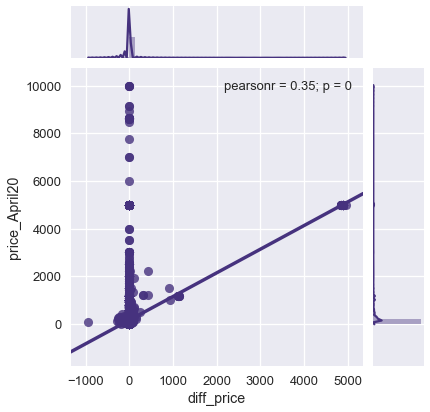

In [93]:

sns.jointplot("diff_price", "price_April20", data=u, kind='reg')

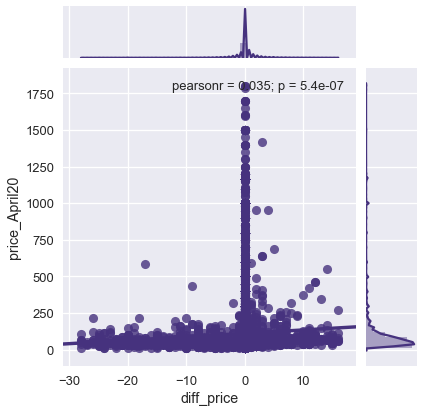

In [94]:

sns.jointplot("diff_price", "price_April20", data=u_out, kind='reg')

In [97]:
len(u[u["diff_price"]>0])

798

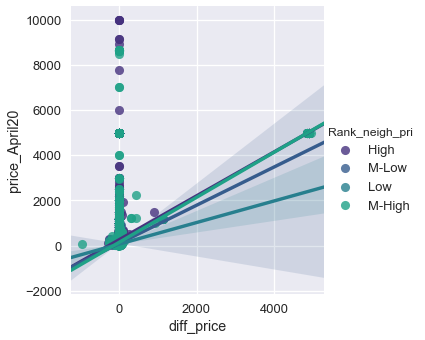

In [98]:
# The average price is very similar in both months
# The neighborhoods with the highest average price have a slightly higher average price
sns.lmplot(x="diff_price", y="price_April20", 
           hue="Rank_neigh_pri", # Grouping variable that will produce elements with different colors.
           data=u)

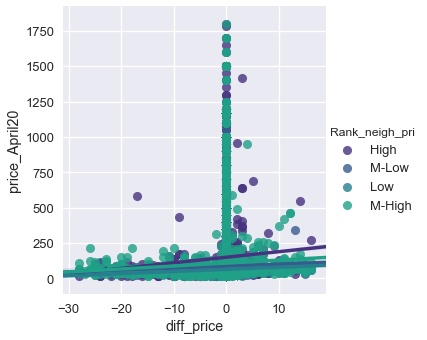

In [99]:
sns.lmplot(x="diff_price", y="price_April20", 
           hue="Rank_neigh_pri", # Grouping variable that will produce elements with different colors.
           data=u_out)

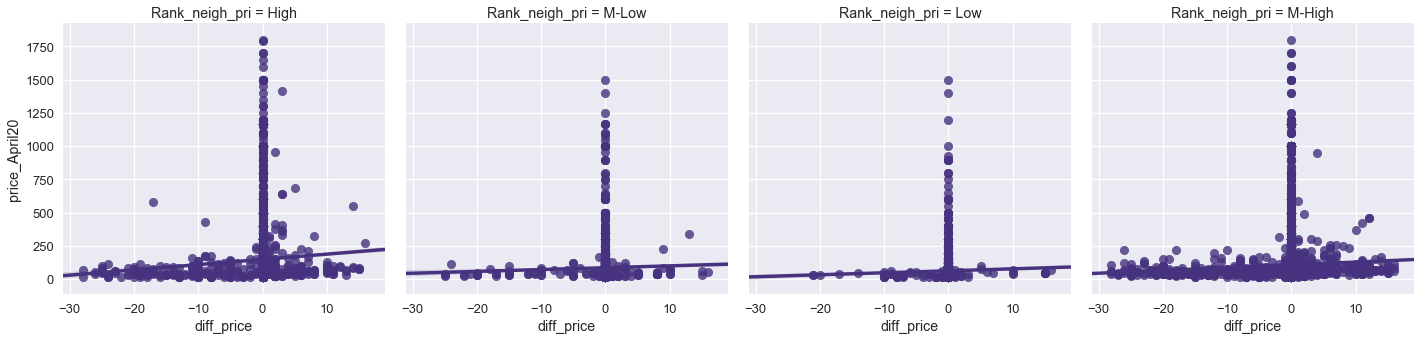

In [100]:
sns.lmplot(x="diff_price", y="price_April20", 
           col="Rank_neigh_pri", # Grouping variable that will produce elements with different colors.
           data=u_out)

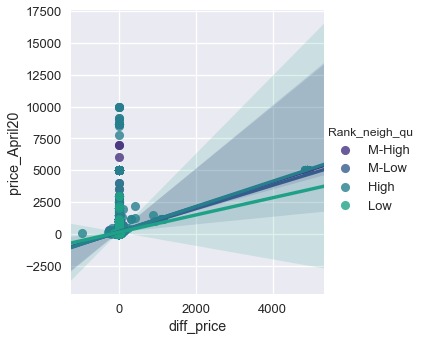

In [101]:
# The average price is very similar in both months
# The neighborhoods with the highest number of rentals have a slightly higher average price

sns.lmplot("diff_price", "price_April20", data=u, hue='Rank_neigh_qu')

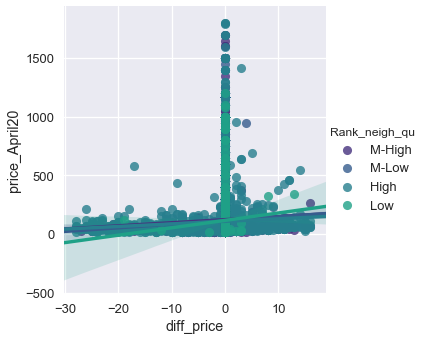

In [102]:
# The average price is very similar in both months
# The neighborhoods with the highest number of rentals have a slightly higher average price

sns.lmplot("diff_price", "price_April20", data=u_out, hue='Rank_neigh_qu')

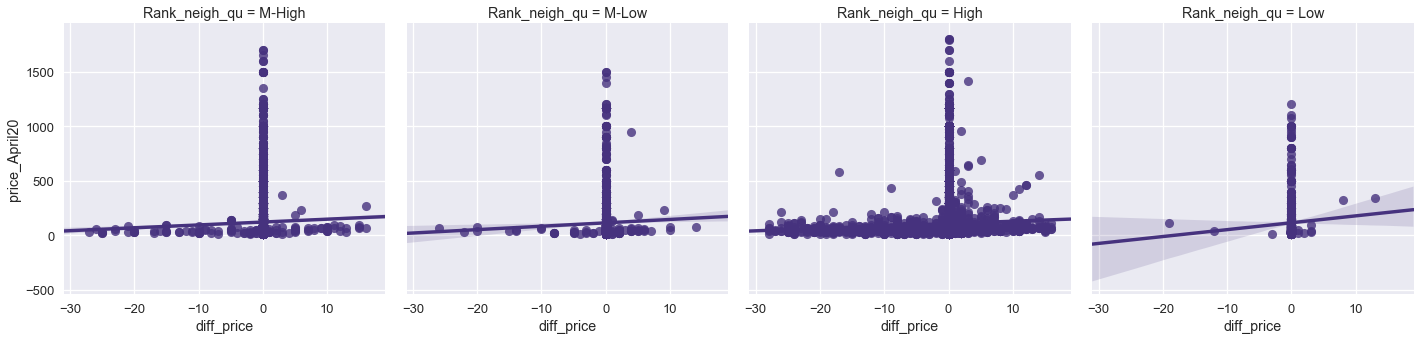

In [103]:
# The average price is very similar in both months
# The neighborhoods with the highest number of rentals have a slightly higher average price

sns.lmplot("diff_price", "price_April20", data=u_out, col='Rank_neigh_qu')

In [107]:
campos_grupos=['type_April20',]
variables={'id':'nunique','price_April20':'mean','nights_April20':'mean' }
df_typeApril=pd.DataFrame(u.groupby(campos_grupos, as_index=False).aggregate(variables))
df_typeApril.rename(columns={'id': 'Quantity'}, inplace=True)
df_typeApril.head()

,type_April20,nights_April20,Quantity,price_April20
0,Entire home/apt,5.076344,13295,201.991877
1,Hotel room,6.708333,264,288.488636
2,Private room,4.823432,7878,96.517898
3,Shared room,3.112994,354,129.612994


In [108]:
campos_grupos=['type_March20',]
variables={'id':'nunique','price_March20':'mean','nights_March20':'mean' }
df_typeMarch=pd.DataFrame(u.groupby(campos_grupos, as_index=False).aggregate(variables))
df_typeMarch.rename(columns={'id': 'Quantity'}, inplace=True)
df_typeMarch.head()

,type_March20,price_March20,Quantity,nights_March20
0,Entire home/apt,188.680917,13520,4.657544
1,Hotel room,274.433198,247,6.866397
2,Private room,96.427631,8049,4.464530
3,Shared room,130.033898,354,3.039548


## check change night

In [109]:
u_out['nights_check'] = np.where(u_out['nights_April20']==u_out['nights_March20']\
                              , 'yes', 'no')

In [110]:
u_out[(u_out['nights_check'] =='no') & (u_out['nights_April20']\
                                  .notnull()) &  (u_out['nights_March20'].notnull())].head(2)

,id,host_id_April20,neighbourhood_April20,district_April20,nights_April20,price_April20,type_April20,listings_April20,host_id_March20,neighbourhood_March20,...,check_neigh,neighbourhood,check_district,district,Rank_neigh_qu,Rank_neigh_pri,check_type,check_price,diff_price,nights_check
21,14997405,94575991.0,Hispanoamérica,Chamartín,1.0,110.0,Entire home/apt,1.0,94575991.0,Hispanoamérica,...,yes,Hispanoamérica,yes,Chamartín,M-High,High,yes,yes,0.0,no
50,26118019,194114804.0,Hispanoamérica,Chamartín,90.0,300.0,Entire home/apt,1.0,194114804.0,Hispanoamérica,...,yes,Hispanoamérica,yes,Chamartín,M-High,High,yes,yes,0.0,no


In [111]:
u_out[(u_out['nights_check'] =='no') & (u_out['nights_April20']\
                                  .notnull()) &  (u_out['nights_March20'].notnull())].filter(like='night').median()

nights_April20    5.0
nights_March20    2.0
dtype: float64

In [112]:
len(u_out[(u_out['nights_check'] =='no') & (u_out['nights_April20']\
                                  .notnull()) &  (u_out['nights_March20'].notnull())])

544

In [113]:
u_out['nights_check'].value_counts()

yes    19658
no       544
Name: nights_check, dtype: int64

In [114]:
u_out['nights_diff'] = u_out['nights_April20'] - u_out['nights_March20'] 

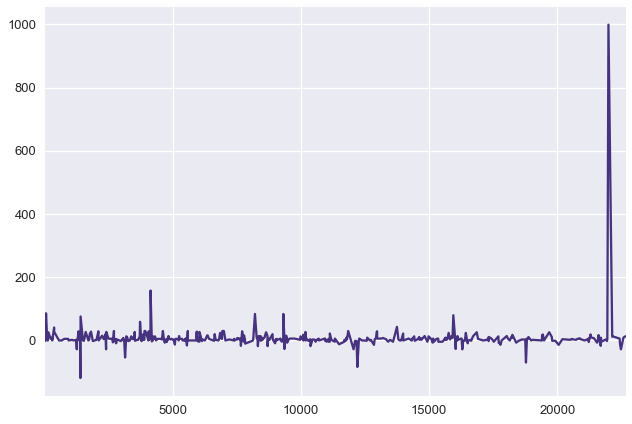

In [115]:
(u_out[(u_out['nights_check'] =='no') & (u_out['nights_April20']\
                                  .notnull()) &  (u_out['nights_March20'].notnull())])['nights_diff'].plot()

In [116]:
campos_grupos=['neighbourhood','type_April20']
variables={'id':'nunique','price_April20':'mean','nights_April20':'mean' }
df_Rtype=pd.DataFrame(u.groupby(campos_grupos, as_index=False).aggregate(variables))
df_Rtype.rename(columns={'id': 'numero'}, inplace=True)
df_Rtype.head()

,neighbourhood,type_April20,nights_April20,numero,price_April20
0,Abrantes,Entire home/apt,1.800000,15,79.933333
1,Abrantes,Private room,1.617647,34,42.970588
2,Abrantes,Shared room,2.500000,2,16.500000
3,Acacias,Entire home/apt,3.742268,97,142.752577
4,Acacias,Hotel room,1.000000,1,71.000000


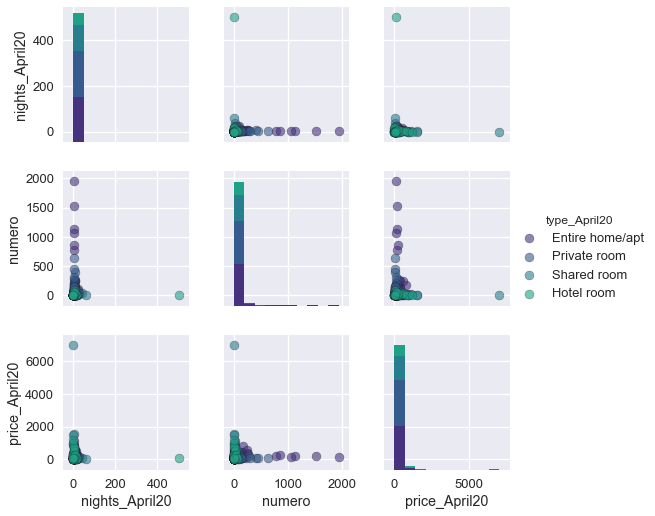

In [117]:
sns.pairplot(df_Rtype, hue='type_April20',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})


In [118]:
print('N Increase April: ' , u_out[u_out['nights_diff'] >0]['nights_diff'].count())
print('Median really increase April : ' , u_out[u_out['nights_diff'] >0]['nights_diff'].median())
print('No Increase: ' , u_out[u_out['nights_diff'] ==0]['nights_diff'].count())
print('Decrease in April: ' , u_out[u_out['nights_diff'] <0]['nights_diff'].count())
print('Median increase : ' , u_out['nights_diff'].median())

('N Increase April: ', 366)
('Median really increase April : ', 5.0)
('No Increase: ', 19658)
('Decrease in April: ', 178)
('Median increase : ', 0.0)


In [119]:
u_out.groupby("type_April20")[['nights_March20','nights_April20']].describe()

nights_March20                                           \
                         count      mean        std  min  25%  50%  75%   
type_April20                                                              
Entire home/apt        12245.0  4.798938  20.891083  1.0  1.0  2.0  3.0   
Hotel room               235.0  7.008511  65.328558  1.0  1.0  1.0  2.0   
Private room            7467.0  4.416365  27.046047  1.0  1.0  1.0  2.0   
Shared room              255.0  3.709804  22.965956  1.0  1.0  1.0  2.0   

                        nights_April20                                      \
                    max          count      mean        std  min  25%  50%   
type_April20                                                                 
Entire home/apt   999.0        12245.0  4.931972  20.967844  1.0  1.0  2.0   
Hotel room       1000.0          235.0  7.131915  65.344547  1.0  1.0  1.0   
Private room     1125.0         7467.0  4.632516  29.466421  1.0  1.0  1.0   
Shared room       360.0          255.0  3.709804  22.965956  1.0  1.0  1.0   

                              
                 75%     max  
type_April20                  
Entire home/apt  3.0   999.0  
Hotel room       2.0  1000.0  
Private room     2.0  1125.0  
Shared room      2.0   360.0

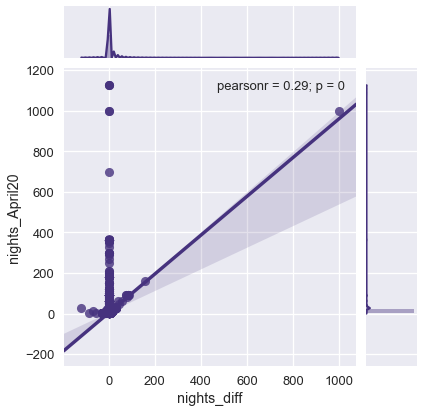

In [120]:
sns.jointplot("nights_diff", "nights_April20", data=u_out, kind='reg');

## Q2 : clear insights

The changes have not been homogeneous throughout Madrid, there are neighbourhoods that have undergone greater changes than others.

The changes is very clear on type of rent


### * **Question 3**: Is the behavior of all host homogeneous?
Understand the type of host and how each guest has behaved in the face of uncertainty

Steps to answer

####  3.1) Check nulls and diferences  in merge dataframe 
####  3.2) Create a filed with the ranges of types of hosts
####  3.3) Create a filed with the ranges of types of hosts
####  3.4) Visualize 
####  3.5) Answer

In [126]:
# 3.1) Host chek: create unique field in merge dataframe
#Field to check if the host_id is the same from one month to another 

u['check_host'] = np.where(u['host_id_April20']==u['host_id_March20']\
                              , 'yes', 'no')

u['check_host'].value_counts()

yes    21131
no      1699
Name: check_host, dtype: int64

In [127]:
# 3.2) Check nulls in merge dataframe 
# What rooms have the different host id and isn´t null

u[(u['check_host'] =='no') & (u['host_id_April20']\
                                  .notnull()) &  (u['host_id_March20'].notnull())]

,id,host_id_April20,neighbourhood_April20,district_April20,nights_April20,price_April20,type_April20,listings_April20,host_id_March20,neighbourhood_March20,...,check_neigh,neighbourhood,check_district,district,Rank_neigh_qu,Rank_neigh_pri,check_type,check_price,diff_price,check_host


In [128]:
# create a unique filed host_id fill with the host_id of april by default

u['host'] = u['host_id_April20']
u['host'] = u['host'].fillna(u['host_id_March20'])

In [129]:
# top host
host = u.groupby('host')['id'].nunique()
print(host.describe())
host.sort_values(ascending=False).head(5)

count    12716.000000
mean         1.795376
std          4.536075
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        252.000000
Name: id, dtype: float64


host
102947901.0    252
247570318.0    150
206349691.0    136
28038703.0     127
99018982.0     122
Name: id, dtype: int64

In [130]:
u.groupby('type_April20')['host_id_April20','host_id_March20'].nunique()

,host_id_April20,host_id_March20
type_April20,,
Entire home/apt,7244,7139
Hotel room,61,56
Private room,5349,5258
Shared room,160,159


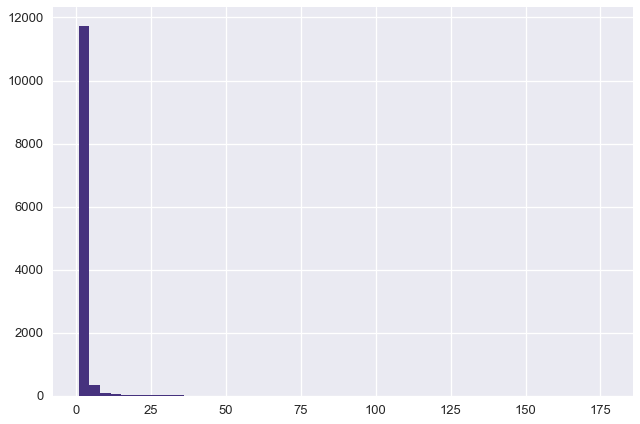

In [131]:
# create if the room is from big host or basic host
u.groupby('host_id_April20')['id'].nunique().hist(bins=50)

In [132]:
# Field to check if the listing is the same from one month to another 

u['check_listing'] = np.where(u['listings_April20']==u['listings_March20']\
                              , 'yes', 'no')

u['check_listing'].value_counts()

yes    18964
no      3866
Name: check_listing, dtype: int64

In [133]:
len(u[(u['check_listing'] =='no') & (u['listings_April20']\
                                  .notnull()) &  (u['listings_March20'].notnull())])

2167

In [134]:
# What rooms have the different listing and isn´t null

u[(u['check_listing'] =='no') & (u['listings_April20']\
                                  .notnull()) &  (u['listings_March20'].notnull())]

,id,host_id_April20,neighbourhood_April20,district_April20,nights_April20,price_April20,type_April20,listings_April20,host_id_March20,neighbourhood_March20,...,check_district,district,Rank_neigh_qu,Rank_neigh_pri,check_type,check_price,diff_price,check_host,host,check_listing
16,13724416,27526991.0,Hispanoamérica,Chamartín,1.0,96.0,Entire home/apt,45.0,27526991.0,Hispanoamérica,...,yes,Chamartín,M-High,High,yes,yes,0.0,yes,27526991.0,no
26,16075620,100336740.0,Hispanoamérica,Chamartín,1.0,114.0,Entire home/apt,50.0,100336740.0,Hispanoamérica,...,yes,Chamartín,M-High,High,yes,no,73.0,yes,100336740.0,no
50,26118019,194114804.0,Hispanoamérica,Chamartín,90.0,300.0,Entire home/apt,1.0,194114804.0,Hispanoamérica,...,yes,Chamartín,M-High,High,yes,yes,0.0,yes,194114804.0,no
60,30167245,28038703.0,Hispanoamérica,Chamartín,3.0,5000.0,Entire home/apt,124.0,28038703.0,Hispanoamérica,...,yes,Chamartín,M-High,High,yes,yes,0.0,yes,28038703.0,no
79,36369704,247570318.0,Hispanoamérica,Chamartín,30.0,55.0,Entire home/apt,150.0,247570318.0,Hispanoamérica,...,yes,Chamartín,M-High,High,yes,no,-33.0,yes,247570318.0,no
80,37032872,28038703.0,Hispanoamérica,Chamartín,3.0,5000.0,Entire home/apt,124.0,28038703.0,Hispanoamérica,...,yes,Chamartín,M-High,High,yes,yes,0.0,yes,28038703.0,no
92,40023896,28038703.0,Hispanoamérica,Chamartín,3.0,5000.0,Entire home/apt,124.0,28038703.0,Hispanoamérica,...,yes,Chamartín,M-High,High,yes,yes,0.0,yes,28038703.0,no
102,41699210,102947901.0,Hispanoamérica,Chamartín,1.0,94.0,Entire home/apt,177.0,102947901.0,Hispanoamérica,...,yes,Chamartín,M-High,High,yes,yes,0.0,yes,102947901.0,no
107,42927700,338406162.0,Hispanoamérica,Chamartín,3.0,50.0,Entire home/apt,2.0,338406162.0,Hispanoamérica,...,yes,Chamartín,M-High,High,yes,no,-40.0,yes,338406162.0,no
138,28823796,206349691.0,Cármenes,Latina,1.0,1169.0,Entire home/apt,129.0,206349691.0,Cármenes,...,yes,Latina,M-Low,M-Low,yes,yes,0.0,yes,206349691.0,no


In [135]:
# who change the number of spaces

u[(u['check_listing'] =='no') & (u['listings_April20']\
                                  .notnull()) &  (u['listings_March20'].notnull())].groupby('host_id_April20')['listings_April20','listings_March20'].sum()

,listings_April20,listings_March20
host_id_April20,,
498646.0,9.0,12.0
630482.0,2.0,1.0
723539.0,108.0,81.0
805726.0,20.0,16.0
901218.0,323.0,425.0
1450378.0,1.0,2.0
1714541.0,25.0,45.0
1718458.0,540.0,324.0
2501740.0,15.0,9.0


In [136]:
u['check_hostid'] = np.where(u['host_id_April20']==u['host_id_March20']\
                              , 'yes', 'no')
u['check_hostid'].value_counts()

yes    21131
no      1699
Name: check_hostid, dtype: int64

In [137]:
u[(u['check_hostid'] =='no') & (u['host_id_April20']\
                                  .notnull()) &  (u['host_id_March20'].notnull())]

,id,host_id_April20,neighbourhood_April20,district_April20,nights_April20,price_April20,type_April20,listings_April20,host_id_March20,neighbourhood_March20,...,district,Rank_neigh_qu,Rank_neigh_pri,check_type,check_price,diff_price,check_host,host,check_listing,check_hostid


In [138]:
# create a unique field host_id, fill with the district of april by default.

u['host_id'] = u['host_id_April20']
u['host_id'] = u['host_id_April20'].fillna(u['host_id_March20'])
u['host_id'].nunique()

12716

In [139]:
# create a dataframe by host

campos_grupos=['host_id']
variables={'host_id_April20':'count','host_id_March20':'count'}
df_host=pd.DataFrame(u.groupby(campos_grupos).aggregate(variables))
df_host['diff_nhost'] = df_host['host_id_April20']-df_host['host_id_March20']

print(len(df_host))
print(df_host.sort_values(by=['host_id_April20'],ascending=False).head())
print(df_host.sort_values(by=['host_id_March20'],ascending=False).head())
print(df_host.sort_values(by=['diff_nhost'],ascending=False).head())
print(df_host.sort_values(by=['diff_nhost'],ascending=True).head())

12716
             host_id_March20  host_id_April20  diff_nhost
host_id                                                  
102947901.0              252              177         -75
247570318.0               41              150         109
206349691.0              136              129          -7
28038703.0               127              124          -3
99018982.0               117              122           5
             host_id_March20  host_id_April20  diff_nhost
host_id                                                  
102947901.0              252              177         -75
206349691.0              136              129          -7
28038703.0               127              124          -3
99018982.0               117              122           5
276565844.0              101              101           0
             host_id_March20  host_id_April20  diff_nhost
host_id                                                  
247570318.0               41              150         109
34185119

In [141]:
# Answer data about host

print('number of host that increase number or rents: ' , len(df_host[(df_host['diff_nhost']>0)]))
print('median: ' , df_host[(df_host['diff_nhost']>0)].median())
print('number of host new in april: ' , len(df_host[(df_host['diff_nhost']>0)&(df_host['host_id_March20']==0)]))
print('median: ' , df_host[(df_host['diff_nhost']>0)&(df_host['host_id_March20']==0)].median())

('number of host that increase number or rents: ', 289)
('median: ', host_id_March20    0.0
host_id_April20    1.0
diff_nhost         1.0
dtype: float64)
('number of host new in april: ', 176)
('median: ', host_id_March20    0.0
host_id_April20    1.0
diff_nhost         1.0
dtype: float64)


Only **2.2% of the hosts have increased the number of rentals** they had. Of these hosts 176, **62%, had no rentals in March **.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126c7ca50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x127c16150>]], dtype=object)

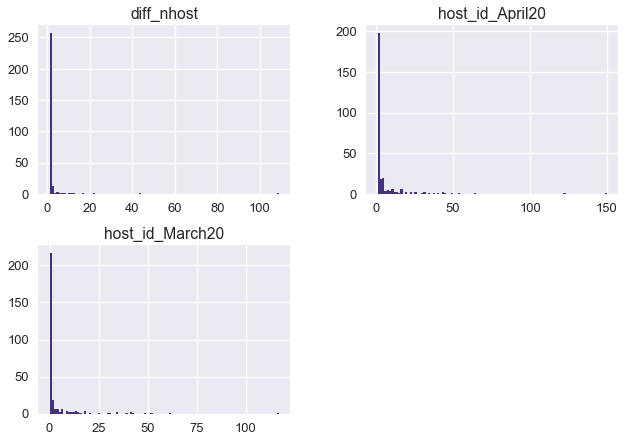

In [142]:
df_host[(df_host['diff_nhost']>0)].hist(bins=100)

In [143]:
# Super host that increase the number of rentals https://www.airbnb.es/users/show/247570318
u[u['host_id_April20']==247570318.0].head(3)

,id,host_id_April20,neighbourhood_April20,district_April20,nights_April20,price_April20,type_April20,listings_April20,host_id_March20,neighbourhood_March20,...,Rank_neigh_qu,Rank_neigh_pri,check_type,check_price,diff_price,check_host,host,check_listing,check_hostid,host_id
79,36369704,247570318.0,Hispanoamérica,Chamartín,30.0,55.0,Entire home/apt,150.0,247570318.0,Hispanoamérica,...,M-High,High,yes,no,-33.0,yes,247570318.0,no,yes,247570318.0
109,43102237,247570318.0,Hispanoamérica,Chamartín,30.0,75.0,Entire home/apt,150.0,NaN,NaN,...,M-High,High,no,no,NaN,no,247570318.0,no,no,247570318.0
110,43177408,247570318.0,Hispanoamérica,Chamartín,30.0,60.0,Entire home/apt,150.0,NaN,NaN,...,M-High,High,no,no,NaN,no,247570318.0,no,no,247570318.0


In [144]:
# New host:  https://www.airbnb.es/users/show/247570318 . The 60% of host that increase number of rents are new 

u[u['host_id_April20']==341851190.0].head(3)

,id,host_id_April20,neighbourhood_April20,district_April20,nights_April20,price_April20,type_April20,listings_April20,host_id_March20,neighbourhood_March20,...,Rank_neigh_qu,Rank_neigh_pri,check_type,check_price,diff_price,check_host,host,check_listing,check_hostid,host_id
7914,42970954,341851190.0,Universidad,Centro,5.0,85.0,Entire home/apt,44.0,NaN,NaN,...,High,M-High,no,no,NaN,no,341851190.0,no,no,341851190.0
11468,42987439,341851190.0,Palomeras Bajas,Puente de Vallecas,5.0,65.0,Entire home/apt,44.0,NaN,NaN,...,M-High,M-High,no,no,NaN,no,341851190.0,no,no,341851190.0
11469,42987862,341851190.0,Palomeras Bajas,Puente de Vallecas,5.0,44.0,Entire home/apt,44.0,NaN,NaN,...,M-High,M-High,no,no,NaN,no,341851190.0,no,no,341851190.0


In [145]:
df_host.describe()

,host_id_March20,host_id_April20,diff_nhost
count,12716.000000,12716.000000,12716.000000
mean,1.743473,1.713668,-0.029805
std,4.278169,4.158769,1.499186
min,0.000000,0.000000,-75.000000
25%,1.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000
75%,1.000000,1.000000,0.000000
max,252.000000,177.000000,109.000000


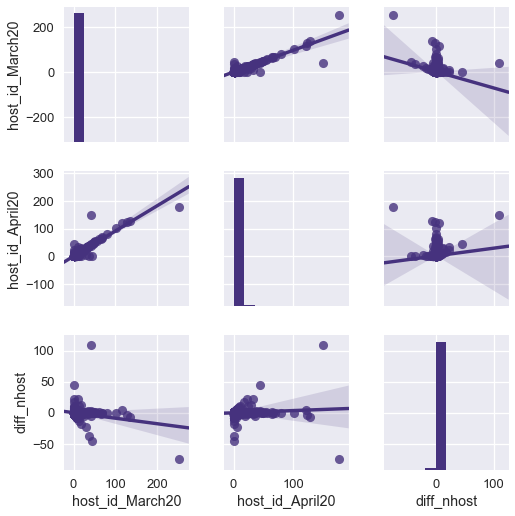

In [146]:
sns.pairplot(df_host, kind="reg")

In [147]:
host = u.groupby('host')['id'].nunique()
print(host.describe())
host.sort_values(ascending=False).head(15)

count    12716.000000
mean         1.795376
std          4.536075
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        252.000000
Name: id, dtype: float64


host
102947901.0    252
247570318.0    150
206349691.0    136
28038703.0     127
99018982.0     122
276565844.0    101
32046323.0      80
107141654.0     69
28786243.0      68
40877988.0      66
5542111.0       65
1408525.0       56
107335103.0     54
100336740.0     50
112373304.0     50
Name: id, dtype: int64

In [148]:
print('host +1 rents: ',len(host[host>1]),'host +2 rents: ',len(host[host>2]),\
     'host +3 rents: ',len(host[host>3]),'host +4 rents: ',len(host[host>50]))
    
                                                                                      

('host +1 rents: ', 2880, 'host +2 rents: ', 1341, 'host +3 rents: ', 822, 'host +4 rents: ', 13)


In [149]:
len(host[host>2])

1341

In [150]:
df_host.head(2)

,host_id_March20,host_id_April20,diff_nhost
host_id,,,
5154.0,1,1,0
7952.0,1,1,0


In [151]:
# ranges of rooms by host

q25_h = df_host['host_id_March20'].quantile(0.25, interpolation='nearest')
q50_h = df_host['host_id_March20'].quantile(0.5, interpolation='nearest')
q75_h = df_host['host_id_March20'].quantile(0.75, interpolation='nearest')
q85_h = df_host['host_id_March20'].quantile(0.85, interpolation='nearest')
q90_h = df_host['host_id_March20'].quantile(0.90, interpolation='nearest')
q95_h = df_host['host_id_March20'].quantile(0.95, interpolation='nearest')

print("q25:%2d ,q50:%2d ,q75 :%2d, ,q85 :%2d, ,q90 :%2d ,q95 :%2d" %(q25_h, q50_h, q75_h,q85_h,q90_h,q95_h))

q25: 1 ,q50: 1 ,q75 : 1, ,q85 : 2, ,q90 : 3 ,q95 : 4


In [152]:
# ranges of rooms by host

q25_h = df_host['host_id_April20'].quantile(0.25, interpolation='nearest')
q50_h = df_host['host_id_April20'].quantile(0.5, interpolation='nearest')
q75_h = df_host['host_id_April20'].quantile(0.75, interpolation='nearest')
q85_h = df_host['host_id_April20'].quantile(0.85, interpolation='nearest')
q90_h = df_host['host_id_April20'].quantile(0.90, interpolation='nearest')
q95_h = df_host['host_id_April20'].quantile(0.95, interpolation='nearest')

print("q25:%2d ,q50:%2d ,q75 :%2d, ,q85 :%2d, ,q90 :%2d ,q95 :%2d" %(q25_h, q50_h, q75_h,q85_h,q90_h,q95_h))

q25: 1 ,q50: 1 ,q75 : 1, ,q85 : 2, ,q90 : 2 ,q95 : 4


In [155]:
conditions = [
    (df_host['host_id_April20'] <= q75_h),
    (df_host['host_id_April20'] <= q90_h) & (df_host['host_id_April20'] > q75_h),
    (df_host['host_id_April20'] > q90_h)]
choices = ['Low','Medium','High']

In [154]:
# Create ranges of host by number or rooms

df_host['Rank_host_Ap'] = np.select(conditions, choices, default='null')
df_host['Rank_host_Ap']
df_host.head(3)

,host_id_March20,host_id_April20,diff_nhost,Rank_host_Ap
host_id,,,,
5154.0,1,1,0,Low
7952.0,1,1,0,Low
13660.0,1,1,0,Low


In [156]:
df_host1 = df_host.reset_index()
df_host1 =df_host1[['diff_nhost','Rank_host_Ap','host_id']]
df_host1.head()

,diff_nhost,Rank_host_Ap,host_id
0,0,Low,5154.0
1,0,Low,7952.0
2,0,Low,13660.0
3,0,Medium,31622.0
4,0,Low,50106.0


In [157]:
u= pd.merge(u, df_host1, on=['host_id'],how='outer')
u.head()

,id,host_id_April20,neighbourhood_April20,district_April20,nights_April20,price_April20,type_April20,listings_April20,host_id_March20,neighbourhood_March20,...,check_type,check_price,diff_price,check_host,host,check_listing,check_hostid,host_id,diff_nhost,Rank_host_Ap
0,6369,13660.0,Hispanoamérica,Chamartín,1.0,70.0,Private room,1.0,13660.0,Hispanoamérica,...,yes,yes,0.0,yes,13660.0,yes,yes,13660.0,0,Low
1,413240,2056009.0,Hispanoamérica,Chamartín,2.0,48.0,Private room,1.0,2056009.0,Hispanoamérica,...,yes,yes,0.0,yes,2056009.0,yes,yes,2056009.0,0,Low
2,521329,2563986.0,Hispanoamérica,Chamartín,30.0,30.0,Private room,4.0,2563986.0,Hispanoamérica,...,yes,yes,0.0,yes,2563986.0,yes,yes,2563986.0,0,High
3,5210987,2563986.0,Hispanoamérica,Chamartín,30.0,30.0,Private room,4.0,2563986.0,Hispanoamérica,...,yes,yes,0.0,yes,2563986.0,yes,yes,2563986.0,0,High
4,16198827,2563986.0,Hispanoamérica,Chamartín,6.0,45.0,Shared room,4.0,2563986.0,Hispanoamérica,...,yes,yes,0.0,yes,2563986.0,yes,yes,2563986.0,0,High


In [158]:
print(len(u[u['host_id']==247570318.0]))
print(df_host.loc[247570318.0])
u[u['host_id']==247570318.0].head(1)

150
host_id_March20      41
host_id_April20     150
diff_nhost          109
Rank_host_Ap       High
Name: 247570318.0, dtype: object


,id,host_id_April20,neighbourhood_April20,district_April20,nights_April20,price_April20,type_April20,listings_April20,host_id_March20,neighbourhood_March20,...,check_type,check_price,diff_price,check_host,host,check_listing,check_hostid,host_id,diff_nhost,Rank_host_Ap
412,36369704,247570318.0,Hispanoamérica,Chamartín,30.0,55.0,Entire home/apt,150.0,247570318.0,Hispanoamérica,...,yes,no,-33.0,yes,247570318.0,no,yes,247570318.0,109,High


In [159]:
u[(u['Rank_host_Ap']!='Low')&(u['Rank_host_Ap']!='Medium')&(u['Rank_host_Ap']!='High')].filter(like='neighbourhood')

,neighbourhood_April20,neighbourhood_March20,neighbourhood


In [160]:
u[(u['neighbourhood']=='Embajadores')]['Rank_host_Ap'].value_counts()

Low       1287
High      1203
Medium     352
Name: Rank_host_Ap, dtype: int64

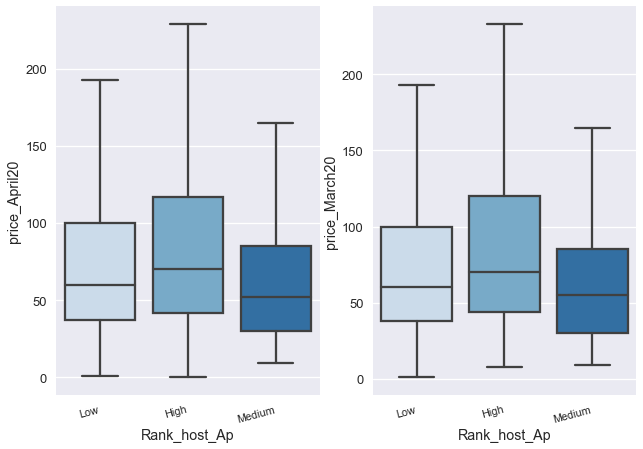

In [161]:
fig, axs = plt.subplots(ncols=2)
g= sns.boxplot(data =u,x='Rank_host_Ap',y='price_April20', showfliers=False, palette=("Blues"), ax=axs[0])
plt.setp(g.get_xticklabels(), rotation=15,horizontalalignment='right',fontweight='light',fontsize='x-small')
g = sns.boxplot(data =u,x='Rank_host_Ap',y='price_March20', showfliers=False, palette=("Blues"), ax=axs[1])
plt.setp(g.get_xticklabels(), rotation=15,horizontalalignment='right',fontweight='light',fontsize='x-small')
sns.set_context("talk");
g.figure.savefig("Boxplot_AribnbMadridCovid5.png")

In [174]:
campos_grupos=['neighbourhood','Rank_neigh_qu']
variables={'id':'nunique','price_April20':'mean','nights_April20':'mean' }
df_neigQ=pd.DataFrame(u.groupby(campos_grupos, as_index=False).aggregate(variables))
df_neigQ.rename(columns={'id': 'numero'}, inplace=True)
df_neigQ.head()

,neighbourhood,Rank_neigh_qu,nights_April20,numero,price_April20
0,Abrantes,M-Low,1.705882,52,52.803922
1,Acacias,High,3.384236,208,91.970443
2,Adelfas,M-High,4.642857,86,66.404762
3,Aeropuerto,Low,5.375000,17,44.562500
4,Aguilas,M-Low,3.244898,49,66.102041


In [175]:
campos_grupos=['neighbourhood','Rank_neigh_qu']
variables={'id':'nunique','price_April20':'mean','nights_April20':'mean' }
df_neigQ_out=pd.DataFrame(u_out.groupby(campos_grupos, as_index=False).aggregate(variables))
df_neigQ_out.rename(columns={'id': 'numero'}, inplace=True)
df_neigQ_out = df_neigQ_out.dropna(axis=0)
df_neigQ_out.head()

,neighbourhood,Rank_neigh_qu,nights_April20,numero,price_April20
0,Abrantes,M-Low,1.604167,48,55.020833
1,Acacias,High,3.428571,196,67.326531
2,Adelfas,M-High,4.826087,69,63.434783
3,Aeropuerto,Low,5.600000,15,46.066667
4,Aguilas,M-Low,3.454545,44,67.068182


In [176]:
df_neigQ1 = df_neigQ.dropna(axis=0)
df_neigQ1.head()

,neighbourhood,Rank_neigh_qu,nights_April20,numero,price_April20
0,Abrantes,M-Low,1.705882,52,52.803922
1,Acacias,High,3.384236,208,91.970443
2,Adelfas,M-High,4.642857,86,66.404762
3,Aeropuerto,Low,5.375000,17,44.562500
4,Aguilas,M-Low,3.244898,49,66.102041


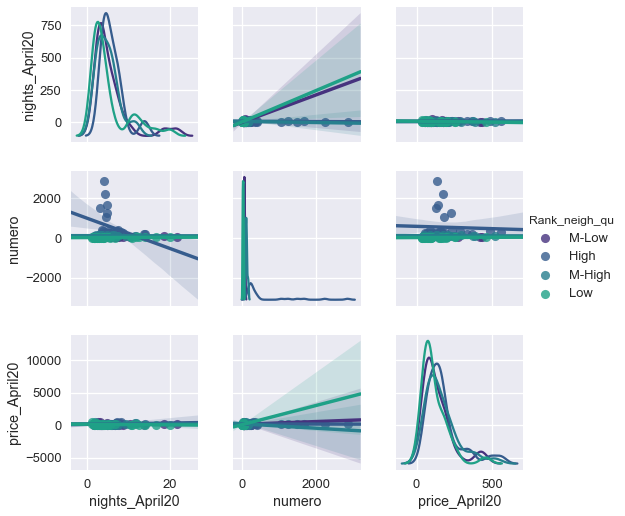

In [177]:
sns.pairplot(df_neigQ1, hue='Rank_neigh_qu', diag_kind="kde", kind="reg")


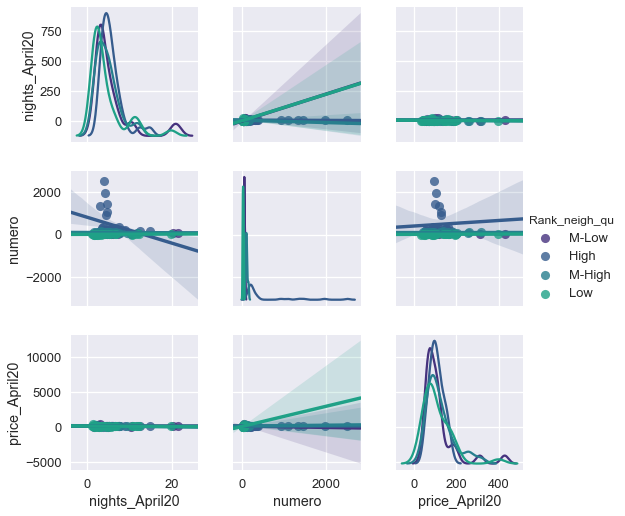

In [178]:
sns.pairplot(df_neigQ_out, hue='Rank_neigh_qu', diag_kind="kde", kind="reg")


In [206]:
campos_grupos=['neighbourhood','Rank_neigh_pri']
variables={'id':'nunique','price_April20':'mean','nights_April20':'mean' }
df_neigP=pd.DataFrame(u.groupby(campos_grupos, as_index=False).aggregate(variables))
df_neigP.rename(columns={'id': 'numero'}, inplace=True)
df_neigP.head()

,neighbourhood,Rank_neigh_pri,nights_April20,numero,price_April20
0,Abrantes,Low,1.705882,52,52.803922
1,Acacias,M-Low,3.384236,208,91.970443
2,Adelfas,Low,4.642857,86,66.404762
3,Aeropuerto,Low,5.375000,17,44.562500
4,Aguilas,Low,3.244898,49,66.102041


In [207]:
df_neigP1 = df_neigP.dropna(axis=0)
df_neigP1.head()

,neighbourhood,Rank_neigh_pri,nights_April20,numero,price_April20
0,Abrantes,Low,1.705882,52,52.803922
1,Acacias,M-Low,3.384236,208,91.970443
2,Adelfas,Low,4.642857,86,66.404762
3,Aeropuerto,Low,5.375000,17,44.562500
4,Aguilas,Low,3.244898,49,66.102041


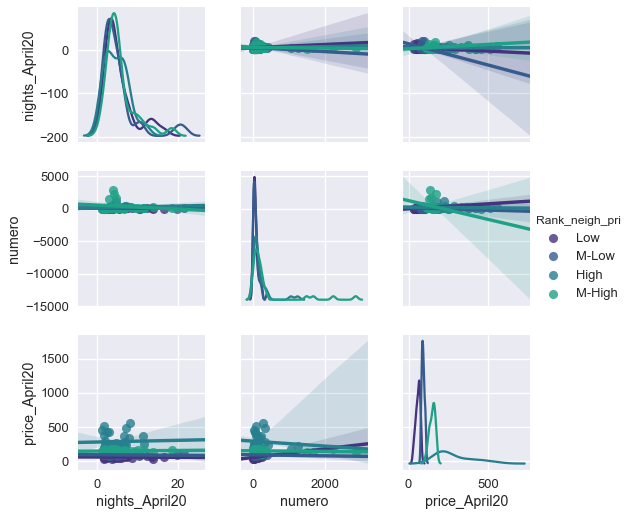

In [208]:
sns.pairplot(df_neigP1, hue='Rank_neigh_pri', diag_kind="kde", kind="reg")

In [213]:
u_out.columns

Index([u'id', u'host_id_April20', u'neighbourhood_April20',
       u'district_April20', u'nights_April20', u'price_April20',
       u'type_April20', u'listings_April20', u'host_id_March20',
       u'neighbourhood_March20', u'district_March20', u'nights_March20',
       u'price_March20', u'type_March20', u'listings_March20', u'check_neigh',
       u'neighbourhood', u'check_district', u'district', u'Rank_neigh_qu',
       u'Rank_neigh_pri', u'check_type', u'check_price', u'diff_price',
       u'nights_check', u'nights_diff'],
      dtype='object')

In [214]:
u_forout = u[['Rank_host_Ap','id']]

In [215]:
u_out = pd.merge(u_out, u_forout, how='outer', on=['id'])

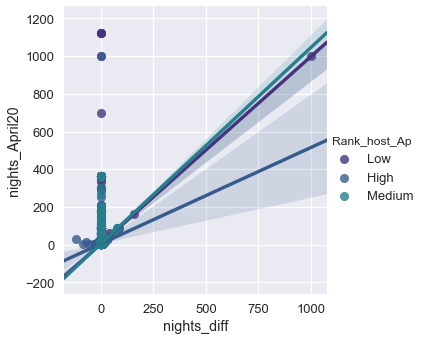

In [216]:
sns.lmplot("nights_diff", "nights_April20", data=u_out, hue='Rank_host_Ap', fit_reg=True)

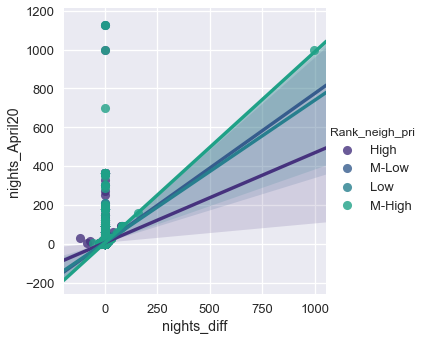

In [210]:
sns.lmplot("nights_diff", "nights_April20", data=u_out, hue='Rank_neigh_pri', fit_reg=True)

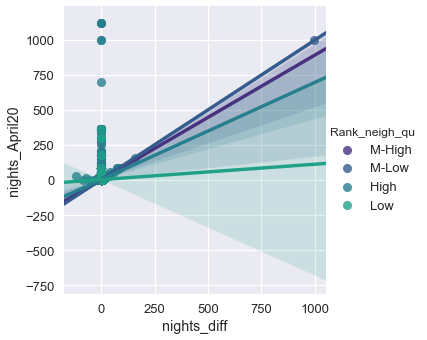

In [211]:
sns.lmplot("nights_diff", "nights_April20", data=u_out, hue='Rank_neigh_qu', fit_reg=True)

In [217]:
Mzll20 = Mz20[['id','latitude', 'longitude']]
Abll20 = Ab20[['id','latitude', 'longitude']]

In [218]:
u_LL = Abll20.merge(Mzll20, how='outer') 
u_LL.head()

,id,latitude,longitude
0,6369,40.45724,-3.67688
1,21853,40.40341,-3.74084
2,23001,40.38695,-3.69304
3,24836,40.41995,-3.69764
4,26825,40.38985,-3.69011


In [219]:
uLLL = u_out.merge(u_LL, on=['id'], how='outer') 

In [220]:
# Read geo data (https://medium.com/@ianforrest11/graphing-latitudes-and-longitudes-on-a-map-bf64d5fca391)
df =uLLL[['latitude','longitude','id','Rank_host_Ap','Rank_neigh_pri',\
      'Rank_neigh_qu','diff_price','price_April20','type_April20']]
print(df.shape )

(22842, 9)


In [ ]:
uLLL.columns

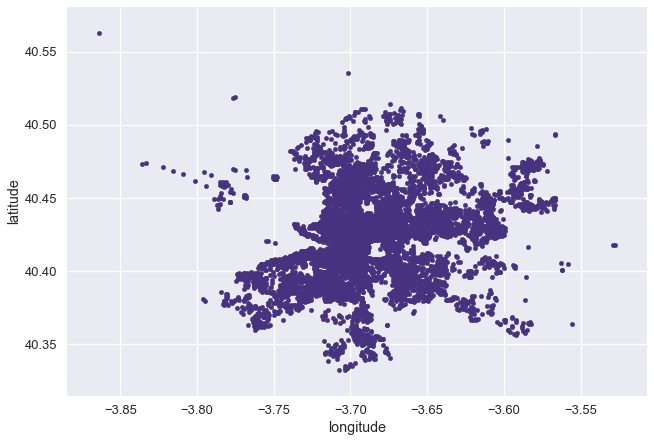

In [221]:
df.plot.scatter(x='longitude',
                      y='latitude')

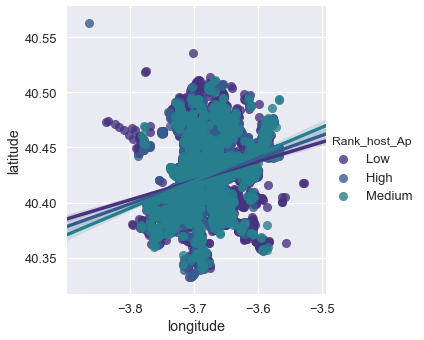

In [222]:
g = sns.lmplot(x="longitude", y="latitude", hue="Rank_host_Ap",
                     data=df)

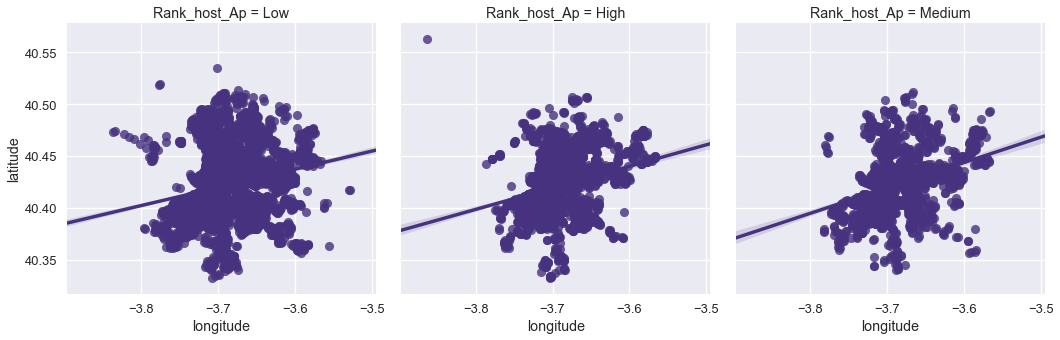

In [223]:
g = sns.lmplot(x="longitude", y="latitude", col="Rank_host_Ap",
                     data=df)

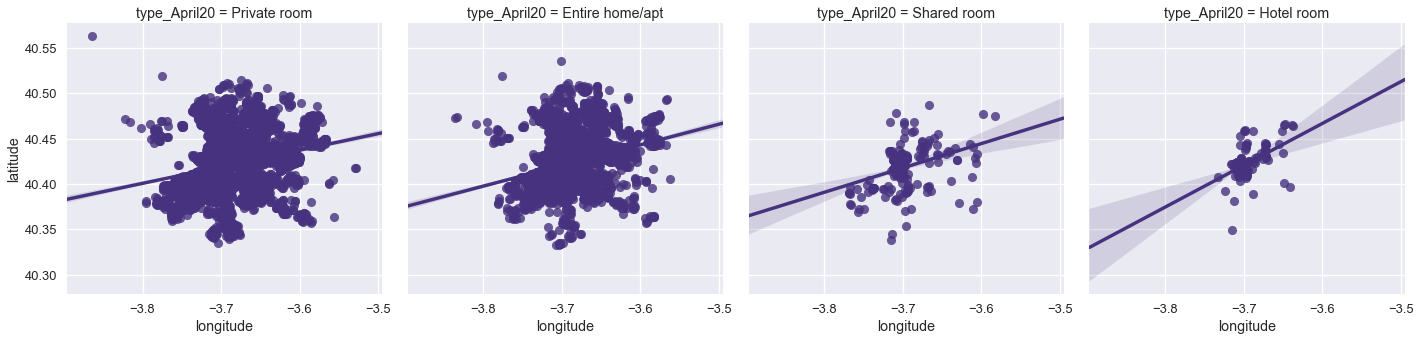

In [224]:
g = sns.lmplot(x="longitude", y="latitude", col="type_April20",
                     data=df)

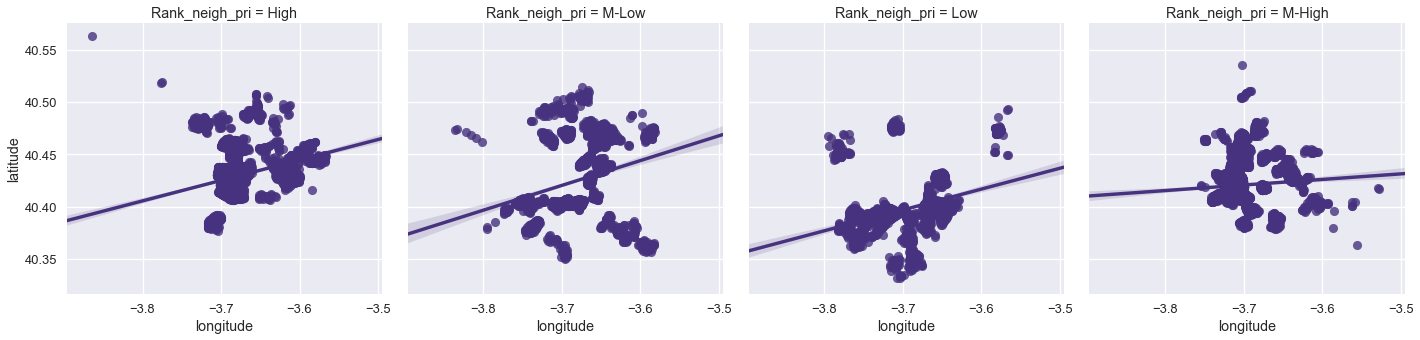

In [225]:
g = sns.lmplot(x="longitude", y="latitude", col="Rank_neigh_pri",
                     data=df)

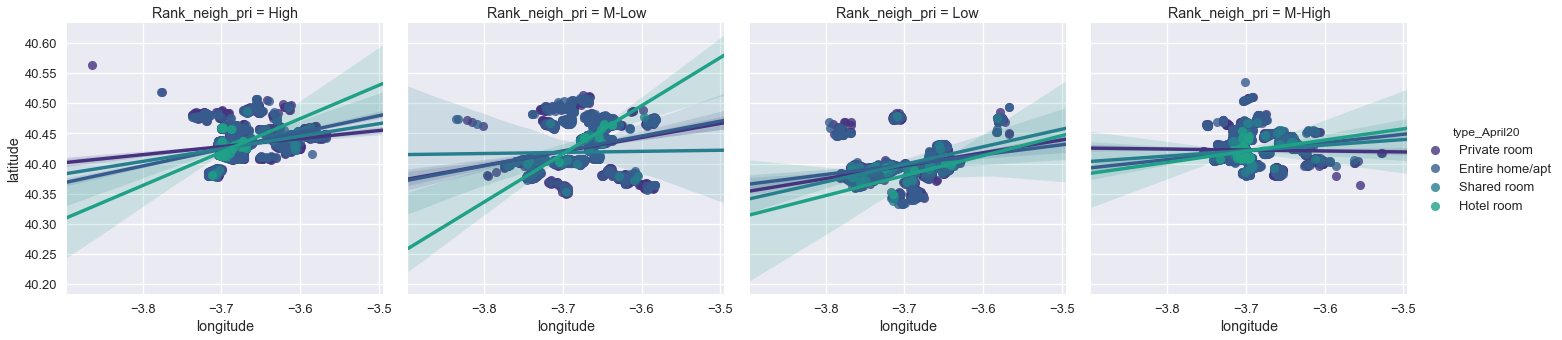

In [226]:
g = sns.lmplot(x="longitude", y="latitude", col="Rank_neigh_pri", hue='type_April20',
                     data=df)

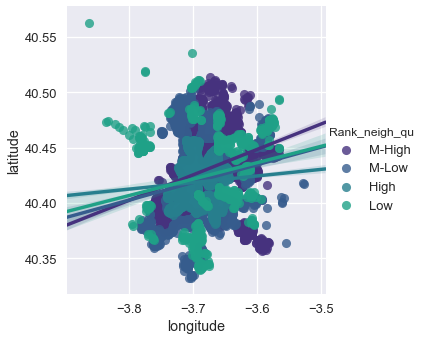

In [227]:
g = sns.lmplot(x="longitude", y="latitude", hue="Rank_neigh_qu",
                     data=df)

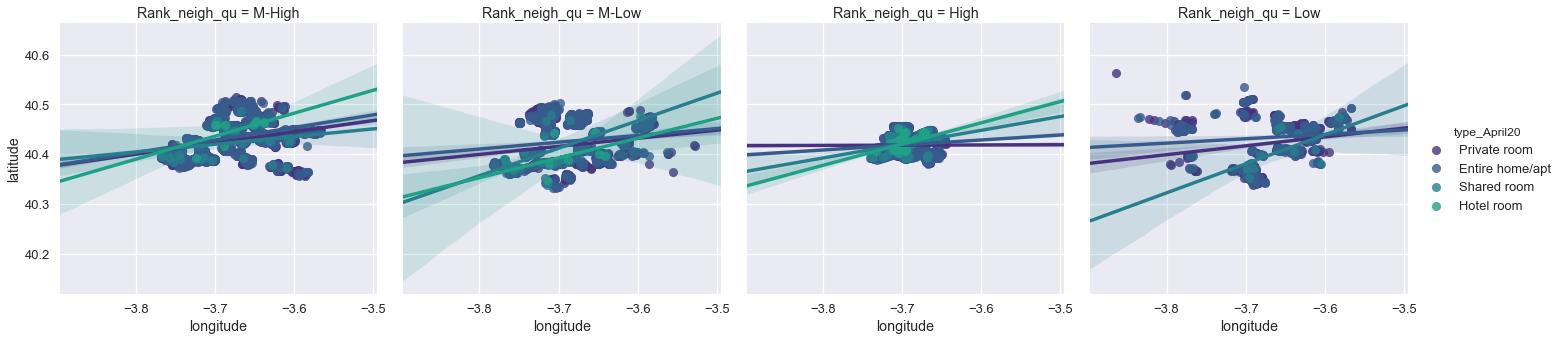

In [228]:
g = sns.lmplot(x="longitude", y="latitude", col="Rank_neigh_qu",hue='type_April20',
                     data=df)

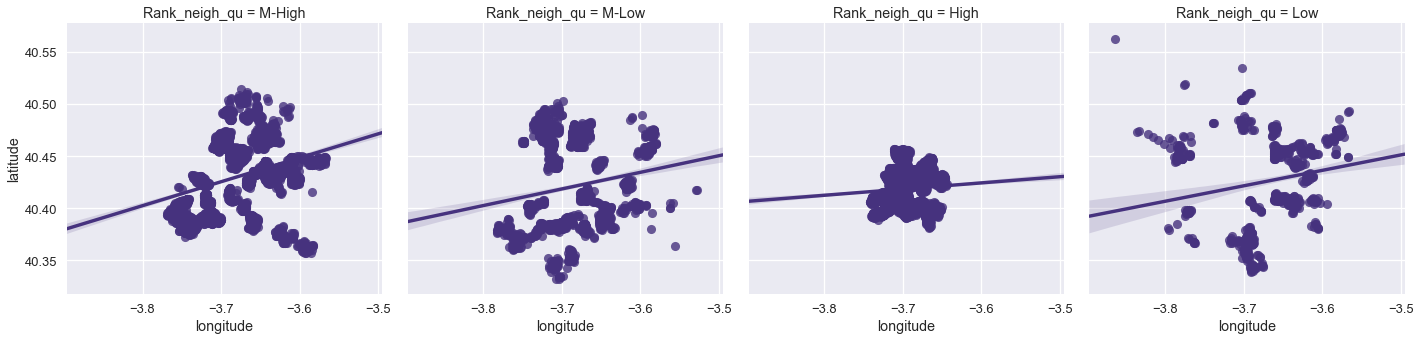

In [229]:
g = sns.lmplot(x="longitude", y="latitude", col="Rank_neigh_qu",
                     data=df)

In [190]:
u_out['diff_price'].describe()

count    20202.00000
mean        -0.21191
std          2.65955
min        -28.00000
25%          0.00000
50%          0.00000
75%          0.00000
max         16.00000
Name: diff_price, dtype: float64

In [230]:
# remove neighbourhood small changes (betwenn -1 and 1)

u_out2= u_out[(u_out["diff_price"] < -1) | (u_out["diff_price"] > 1)]

In [231]:
u_out3 =u_out2[['id','diff_price','neighbourhood']]
u_out3.dropna(axis=0, how='all').head()

,id,diff_price,neighbourhood
25,15705869,15.0,Hispanoamérica
56,29089129,-2.0,Hispanoamérica
210,42502652,2.0,Legazpi
224,374558,5.0,Justicia
233,814586,4.0,Justicia


In [193]:
u_out3.groupby

<bound method DataFrame.groupby of              id  diff_price   neighbourhood
25     15705869        15.0  Hispanoamérica
58     29089129        -2.0  Hispanoamérica
233    42502652         2.0         Legazpi
255      374558         5.0        Justicia
264      814586         4.0        Justicia
275     1242828         2.0        Justicia
279     1362092        10.0        Justicia
280     1496514         3.0        Justicia
293     1917537        -6.0        Justicia
302     2519785       -10.0        Justicia
365     6644323       -13.0        Justicia
369     6881737        -7.0        Justicia
414     9318024        10.0        Justicia
435    11240529       -10.0        Justicia
436    11248487       -10.0        Justicia
437    11248646       -10.0        Justicia
438    11251920       -10.0        Justicia
439    11251956       -10.0        Justicia
440    11260503       -25.0        Justicia
470    13535942        -8.0        Justicia
471    13536292        -8.0        Justic

In [194]:
u_out3['diff_price'].describe()

count    1029.000000
mean       -4.205053
std        11.047287
min       -28.000000
25%       -13.000000
50%        -4.000000
75%         5.000000
max        16.000000
Name: diff_price, dtype: float64

In [195]:
u_out2550 = u_out3[(u_out3["diff_price"] < 5) | (u_out3["diff_price"] > -13)]
u_out2575 = u_out3[(u_out3["diff_price"] < -13) | (u_out3["diff_price"] > 5)]

In [232]:

print('The central data between 25 and 50 are {} observations, the data of the quartiles until \
25 and after 75 are {} observations. The differentes \
of {} cases.'.format(len(u_out2550),(len(u_out2550)-len(u_out2575)),len(u_out2575)))

The central data between 25 and 50 are 1029 observations, the data of the quartiles until 25 and after 75 are 580 observations. The differentes of 449 cases.


In [233]:
campos_grupos=['neighbourhood']
variables={'id':'nunique','diff_price':'mean'}
df_out3=pd.DataFrame(u_out3.groupby(campos_grupos, as_index=False).aggregate(variables))
df_out3.rename(columns={'id': 'numero'}, inplace=True)
df_out3.head()

,neighbourhood,numero,diff_price
0,Abrantes,1,-4.000000
1,Acacias,8,-8.375000
2,Adelfas,2,-2.000000
3,Aeropuerto,1,3.000000
4,Aguilas,3,-6.333333


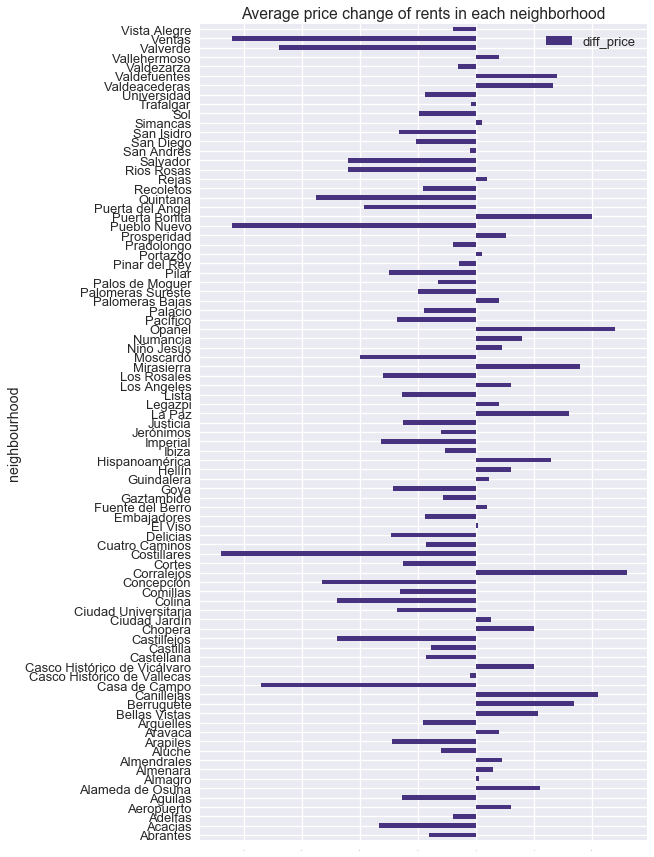

In [234]:
df_out3.plot.barh(x='neighbourhood', y='diff_price',\
                  title="Average price change of rents in each neighborhood", figsize=(8,15));
plt.xticks(fontsize=1)
plt.show();

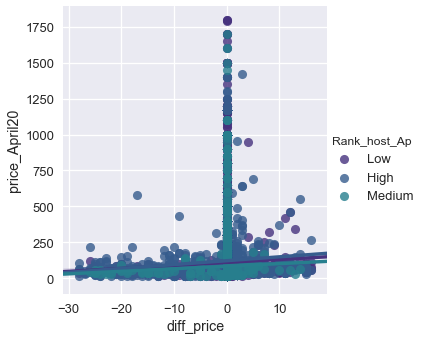

In [235]:
# The average price is very similar in both months
# Neighborhoods with guest rentals with more than 1 rental have a change in price in some cases

sns.lmplot(x="diff_price", y="price_April20", 
           hue="Rank_host_Ap", # Grouping variable that will produce elements with different colors.
           data=u_out)

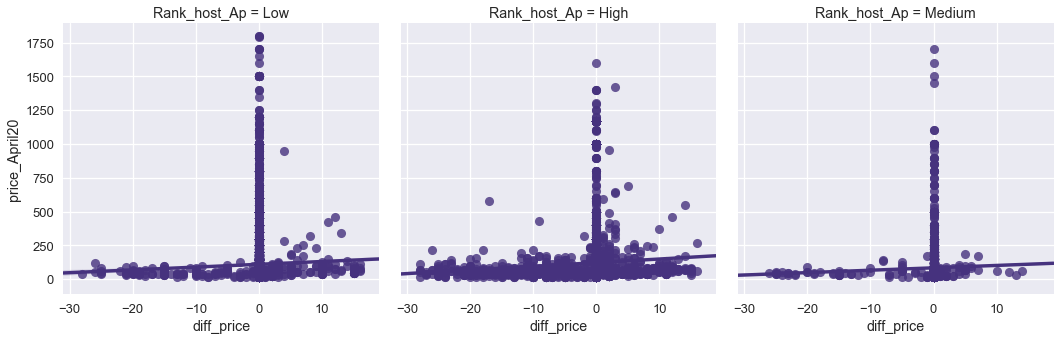

In [236]:
# The average price is very similar in both months
# Neighborhoods with guest rentals with more than 1 rental have a change in price in some cases

sns.lmplot(x="diff_price", y="price_April20", 
           col="Rank_host_Ap", # Grouping variable that will produce elements with different colors.
           data=u_out)

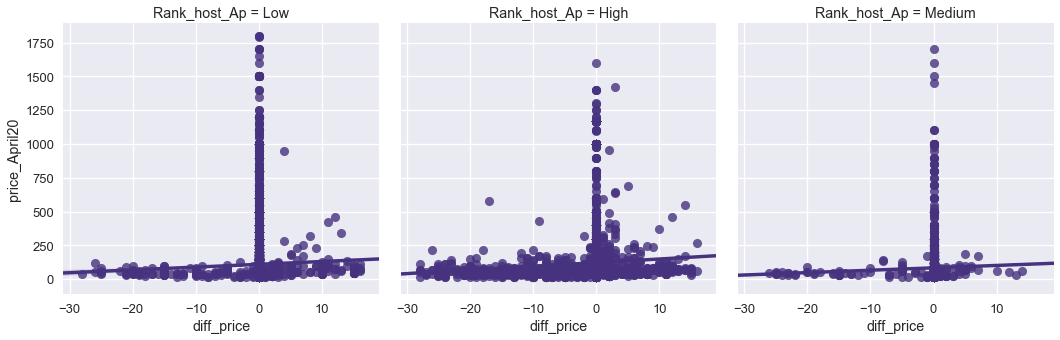

In [237]:

sns.lmplot("diff_price", "price_April20", data=u_out, col='Rank_host_Ap')

In [238]:
campos_grupos=['neighbourhood','Rank_host_Ap']
variables={'id':'nunique','price_April20':'mean','nights_April20':'mean','diff_price':'mean' }
df_neig=pd.DataFrame(u_out.groupby(campos_grupos, as_index=False).aggregate(variables))
df_neig.rename(columns={'id': 'numero'}, inplace=True)
df_neig.head()

,neighbourhood,Rank_host_Ap,diff_price,nights_April20,numero,price_April20
0,Abrantes,High,0.000000,1.300000,10,28.700000
1,Abrantes,Low,-0.111111,1.851852,27,61.851852
2,Abrantes,Medium,0.000000,1.272727,11,62.181818
3,Acacias,High,-0.367647,3.250000,68,56.485294
4,Acacias,Low,-0.388889,3.787037,108,69.287037


In [239]:
df_neig1 = df_neig.dropna(axis=0)
df_neig1.head()

,neighbourhood,Rank_host_Ap,diff_price,nights_April20,numero,price_April20
0,Abrantes,High,0.000000,1.300000,10,28.700000
1,Abrantes,Low,-0.111111,1.851852,27,61.851852
2,Abrantes,Medium,0.000000,1.272727,11,62.181818
3,Acacias,High,-0.367647,3.250000,68,56.485294
4,Acacias,Low,-0.388889,3.787037,108,69.287037


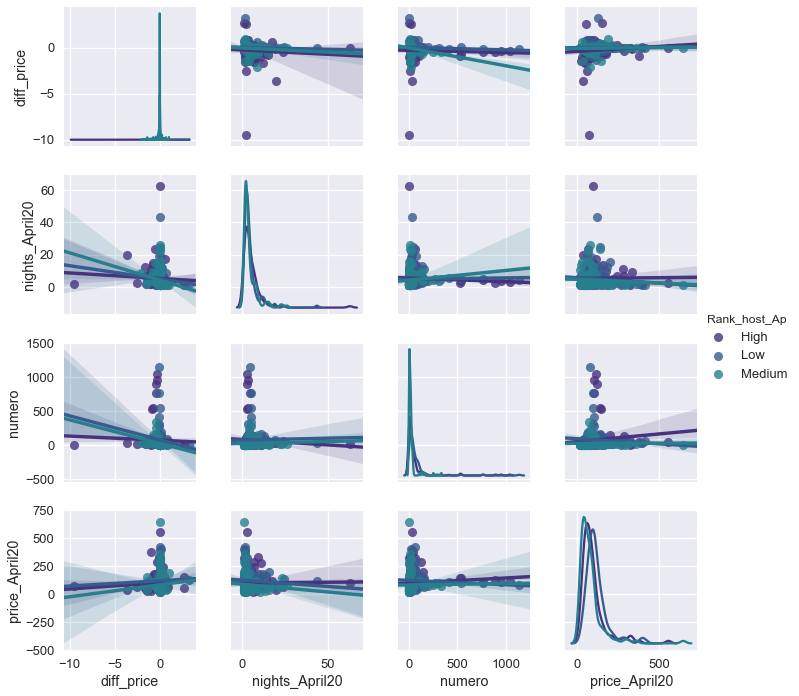

In [240]:
sns.pairplot(df_neig1,hue='Rank_host_Ap', diag_kind="kde", kind="reg")

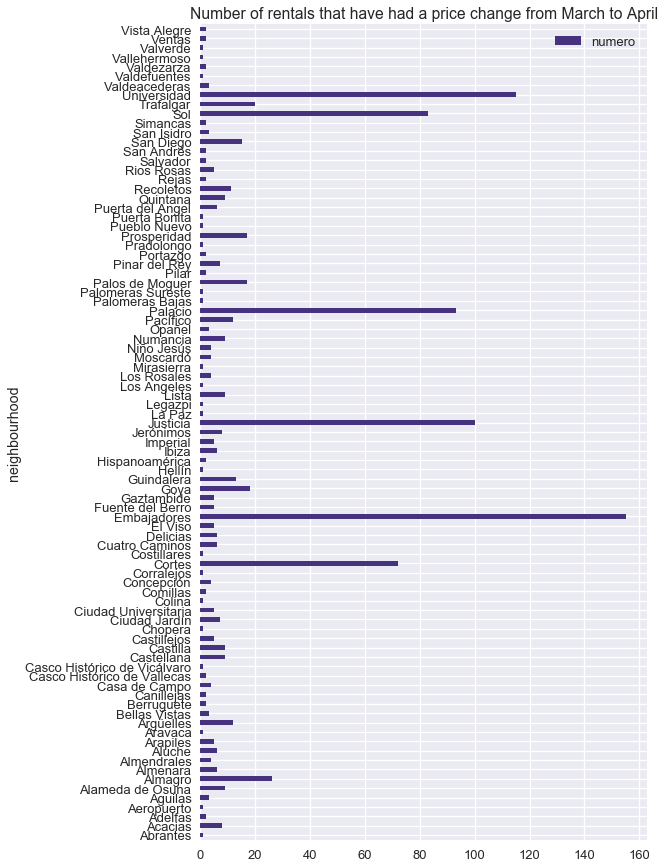

In [205]:
df_out3.plot.barh(x='neighbourhood', y='numero',\
                  title="Number of rentals that have had a price change from March to April", figsize=(8,15));
#plt.xticks()
plt.show();